# Analysing models

### Concatenation of results per datasets to one Excel file

This script processes prediction results from machine learning models, organizes them into structured formats, and saves the results to Excel files for further analysis.

In [1]:
## Import modules
import pandas as pd
from utils.analysis import load_config, process_split_level, save_to_excel

# Main script
config_file_path = './config/chembl_config_lv1.json'
confs = load_config(config_file_path)

files = confs["files"]
met = {
    'svr_tanimoto_split': 'SVR-PK',
    'svr_tanimoto_average': 'SVR-SK',
    'svr_tanimoto_concat': 'SVR-concatECFP',
    'svr_tanimoto': 'SVR-baseline',
}
split_levels = {1: 'Product-based', 2: 'Reactant-based'}
augment = {0: '', 1: '_augmented'}
rxns = pd.read_table('./outputs/dataset_explanation.tsv', index_col='Identifier', header=0)

res_dict_tr_out, res_dict_ts_out = process_split_level(confs, files, split_levels, augment, met, rxns)

save_to_excel(res_dict_tr_out, './outputs/prediction_results_train.xlsx')
save_to_excel(res_dict_ts_out, './outputs/prediction_results_test.xlsx')

100%|██████████| 35391/35391 [00:13<00:00, 2653.98it/s]


### Boxplot for statistic values
This cell processes prediction results from machine learning models, visualizes statistical metrics (e.g., R², MAE) as boxplots, and saves the results for further analysis.

/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:392: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=["" for _ in ax.get_xticklabels()])
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:395: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:392: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=["" for _ in ax.get_xticklabels()])
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:398: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=fsize)
/home/yuto_i

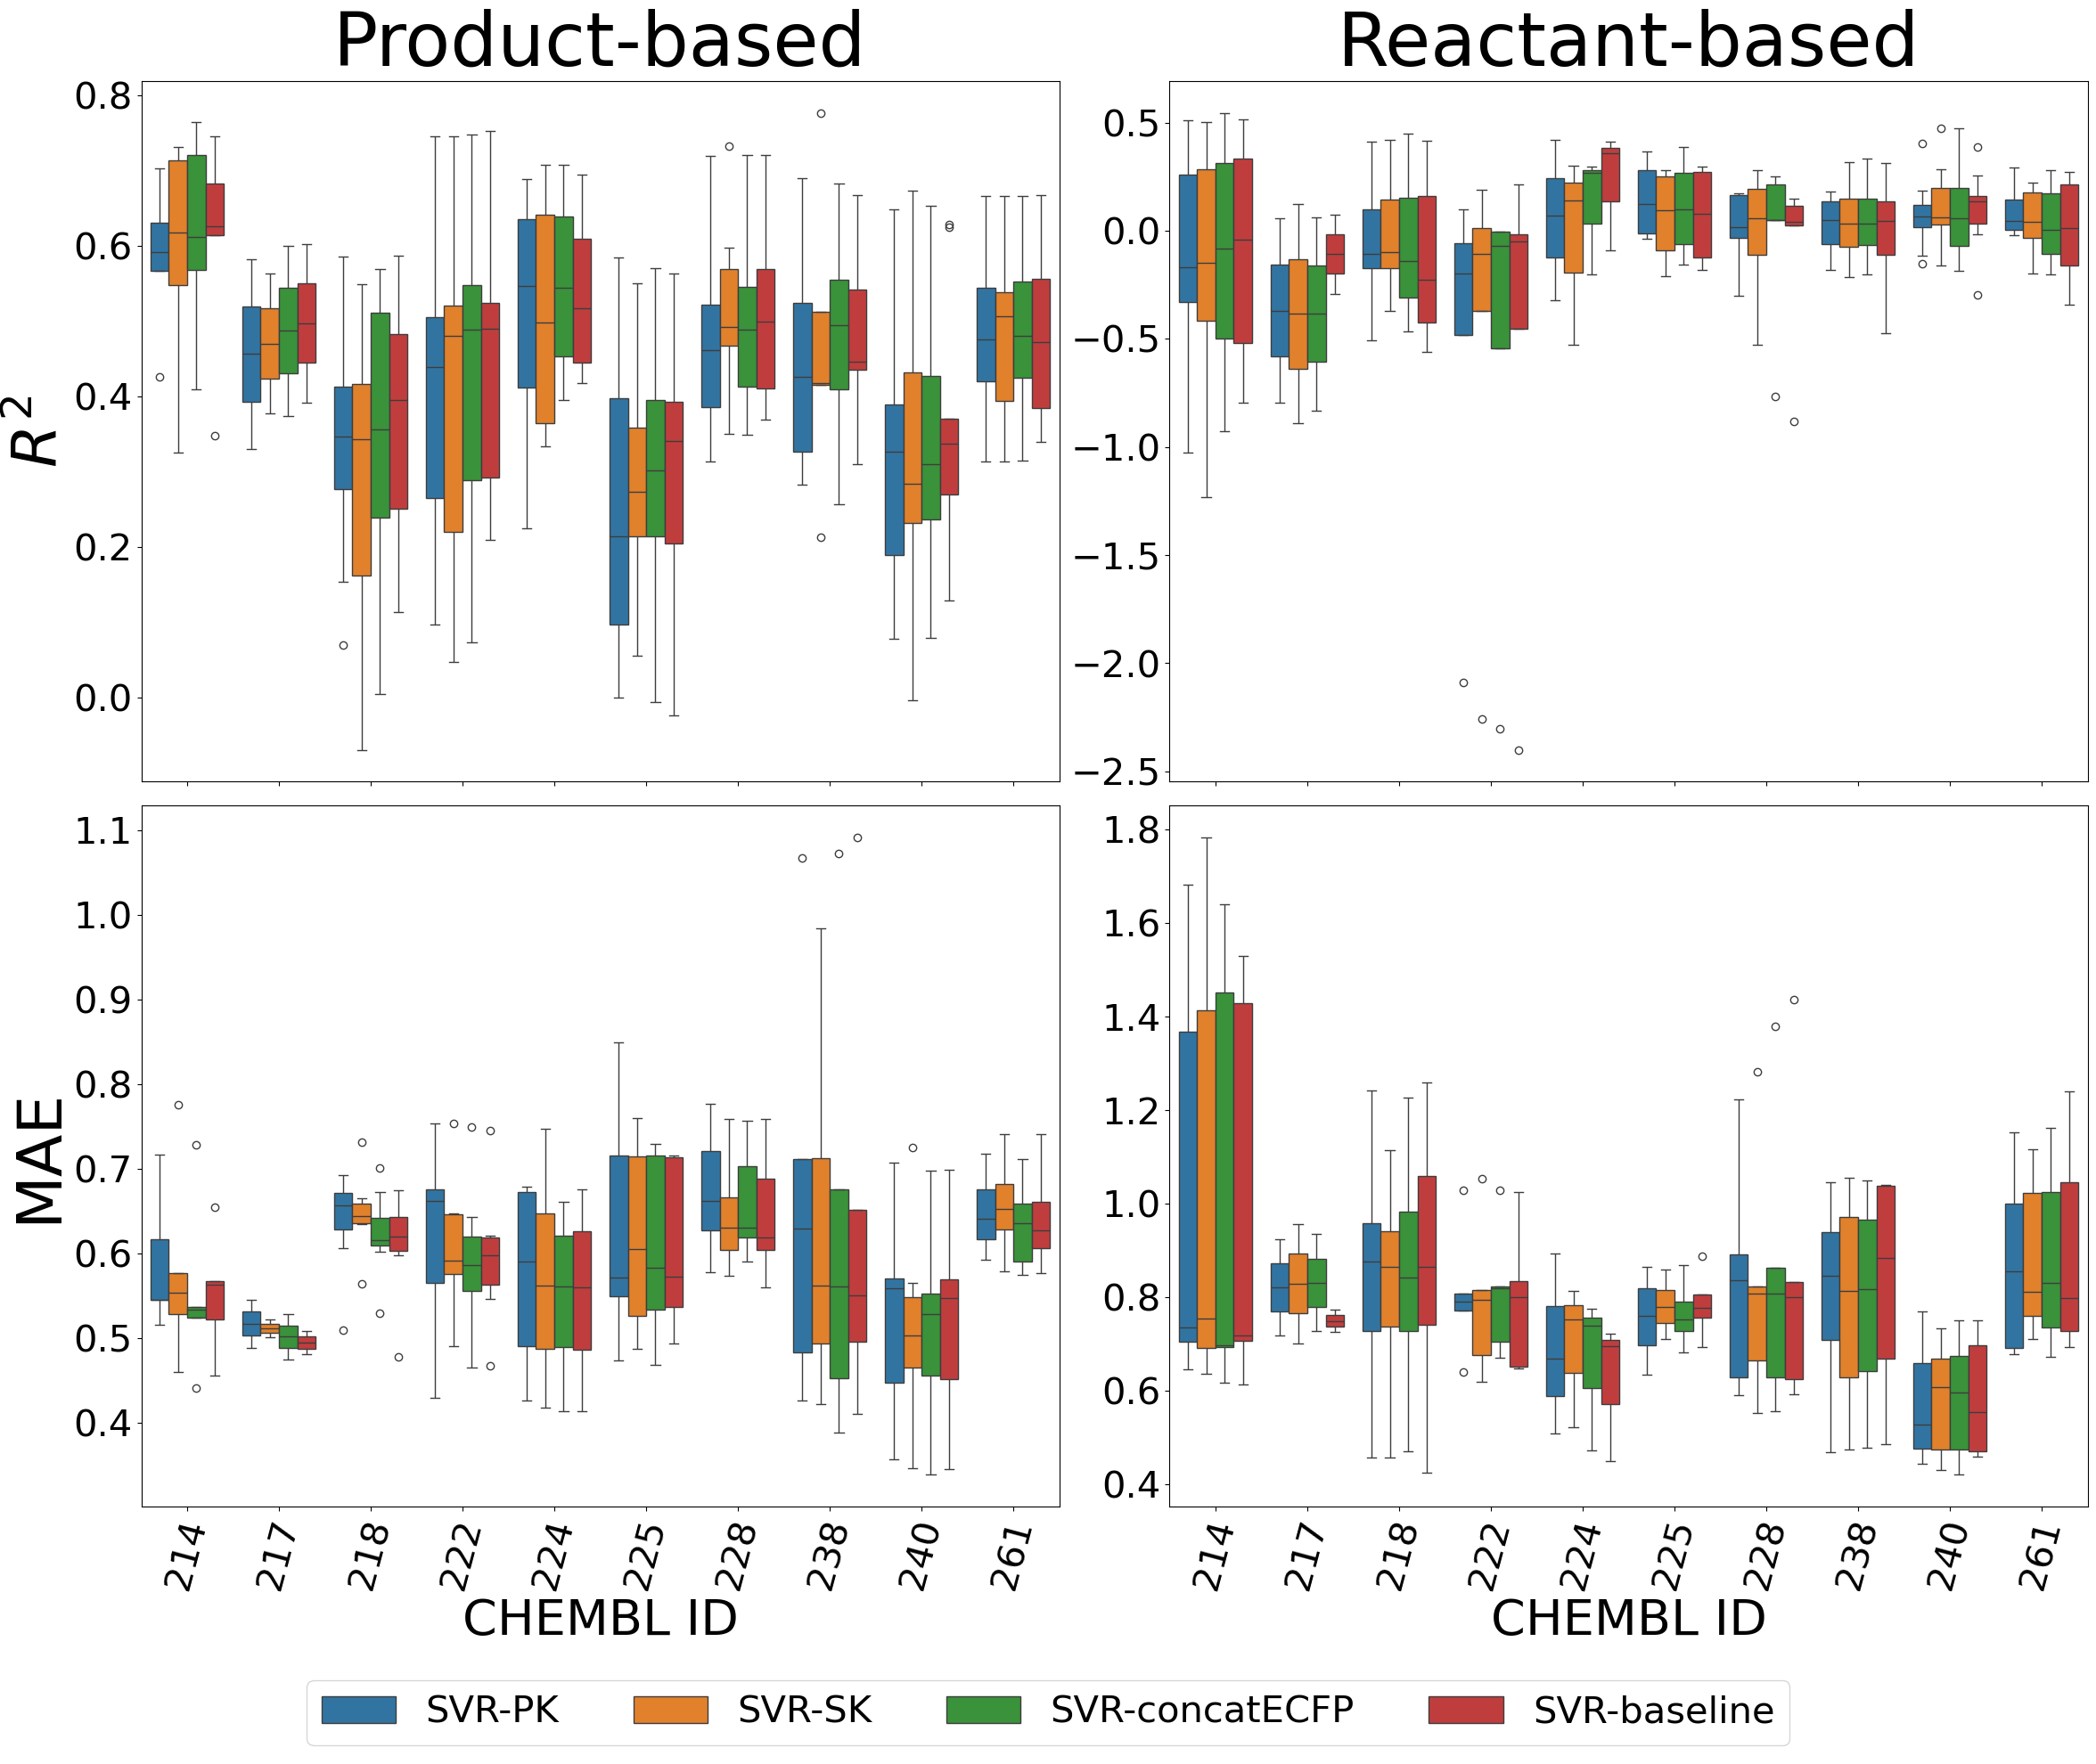

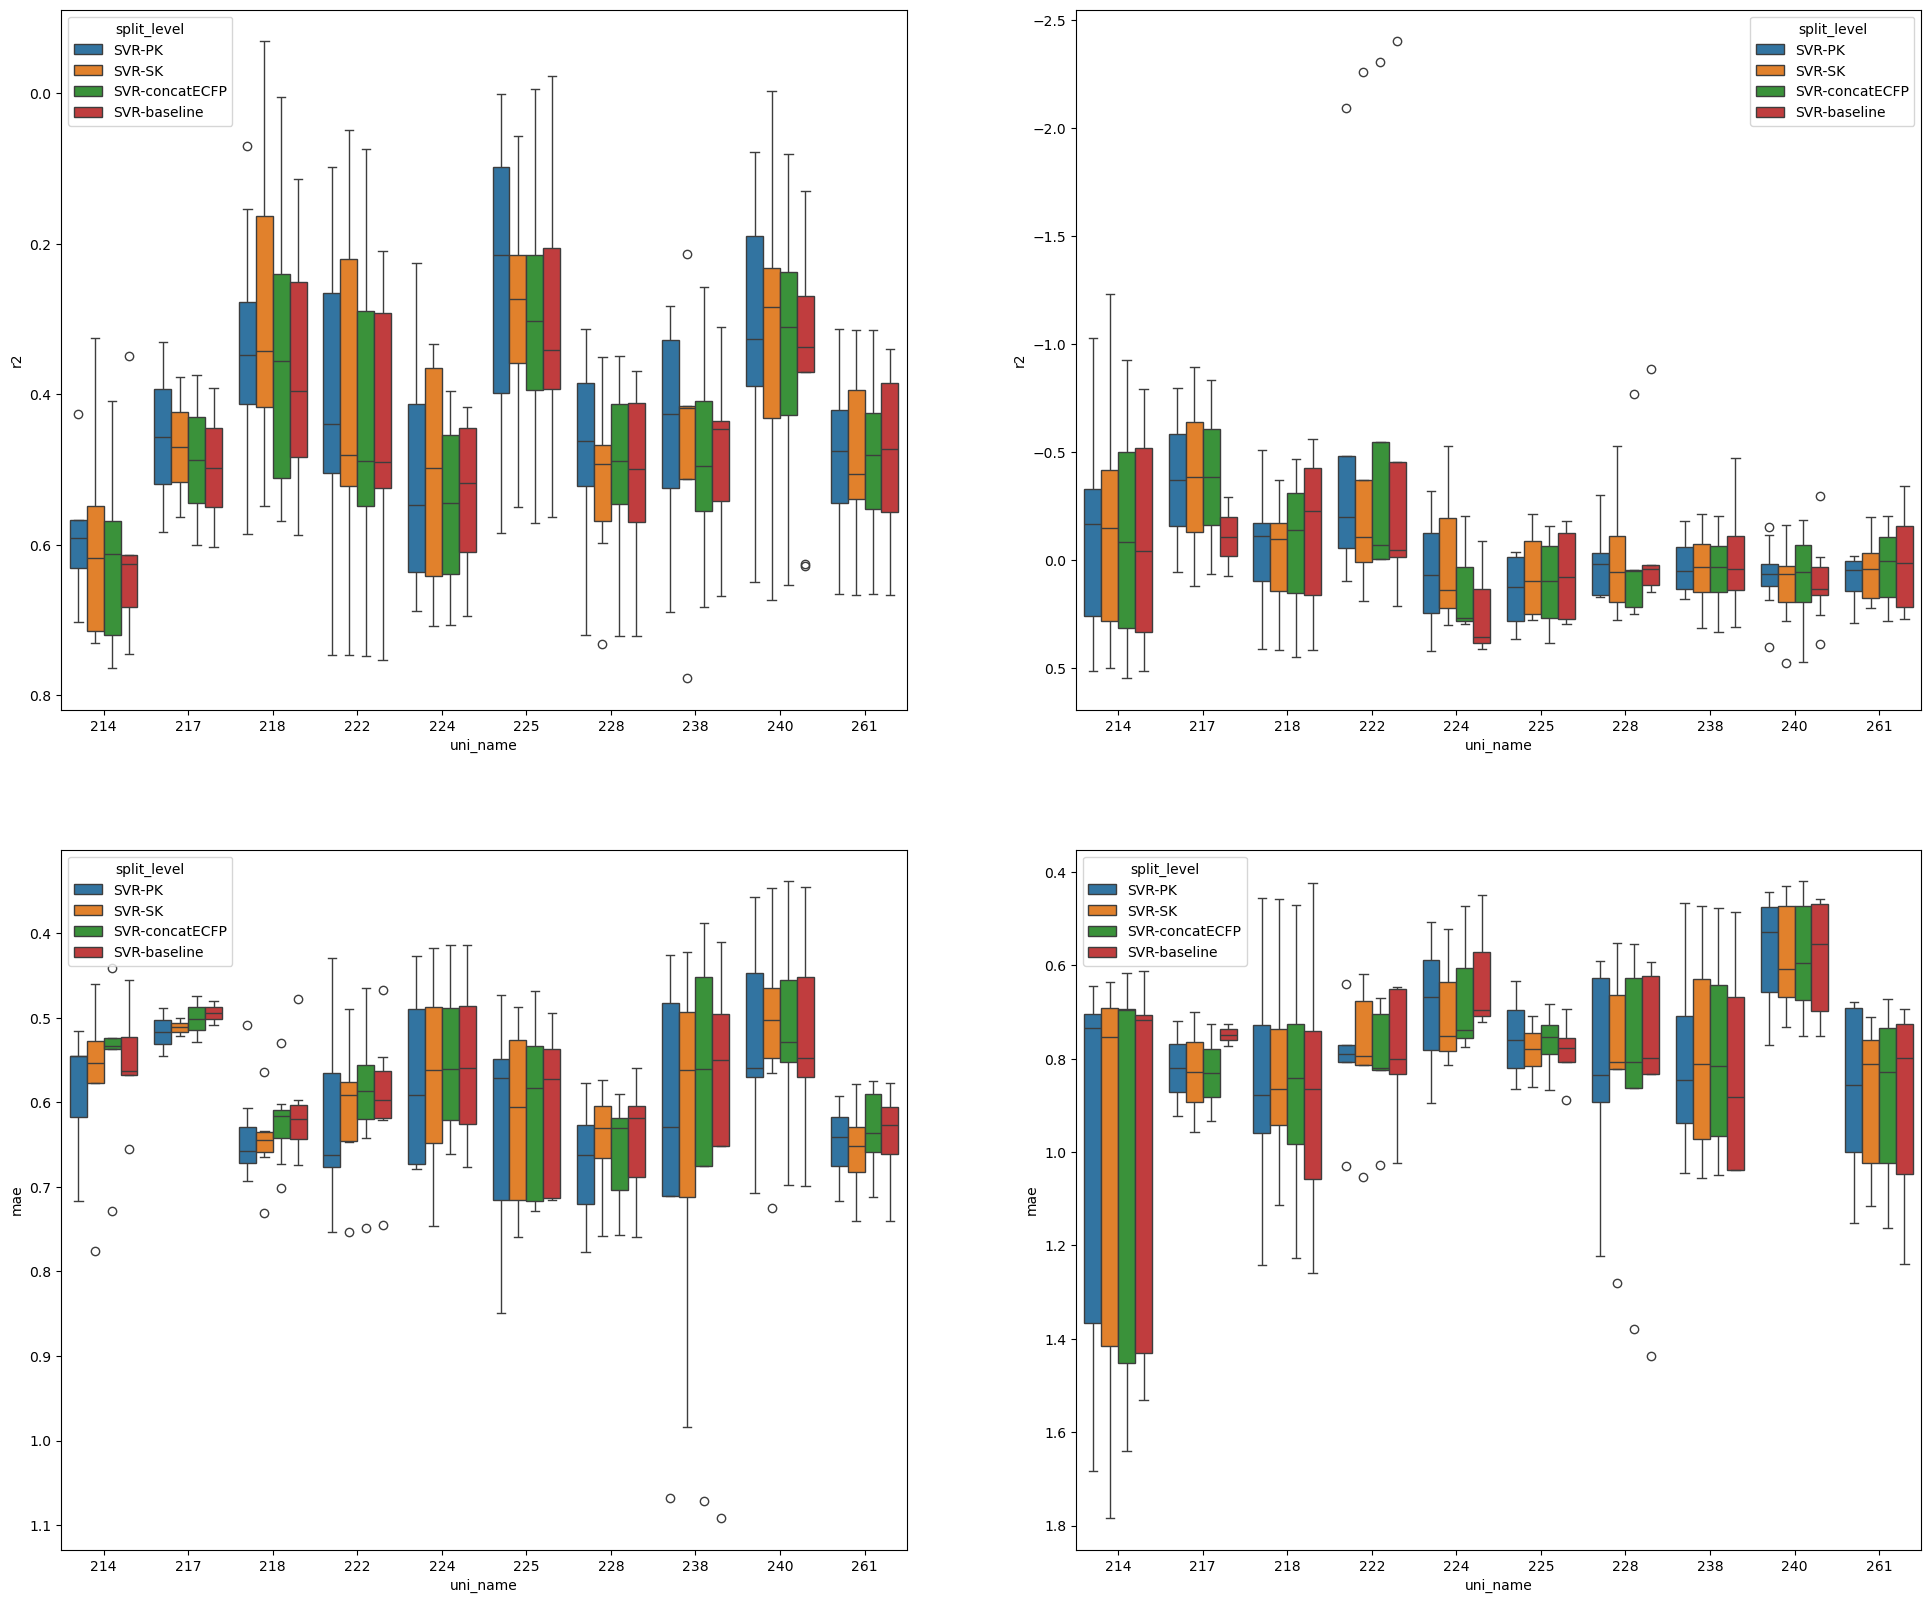

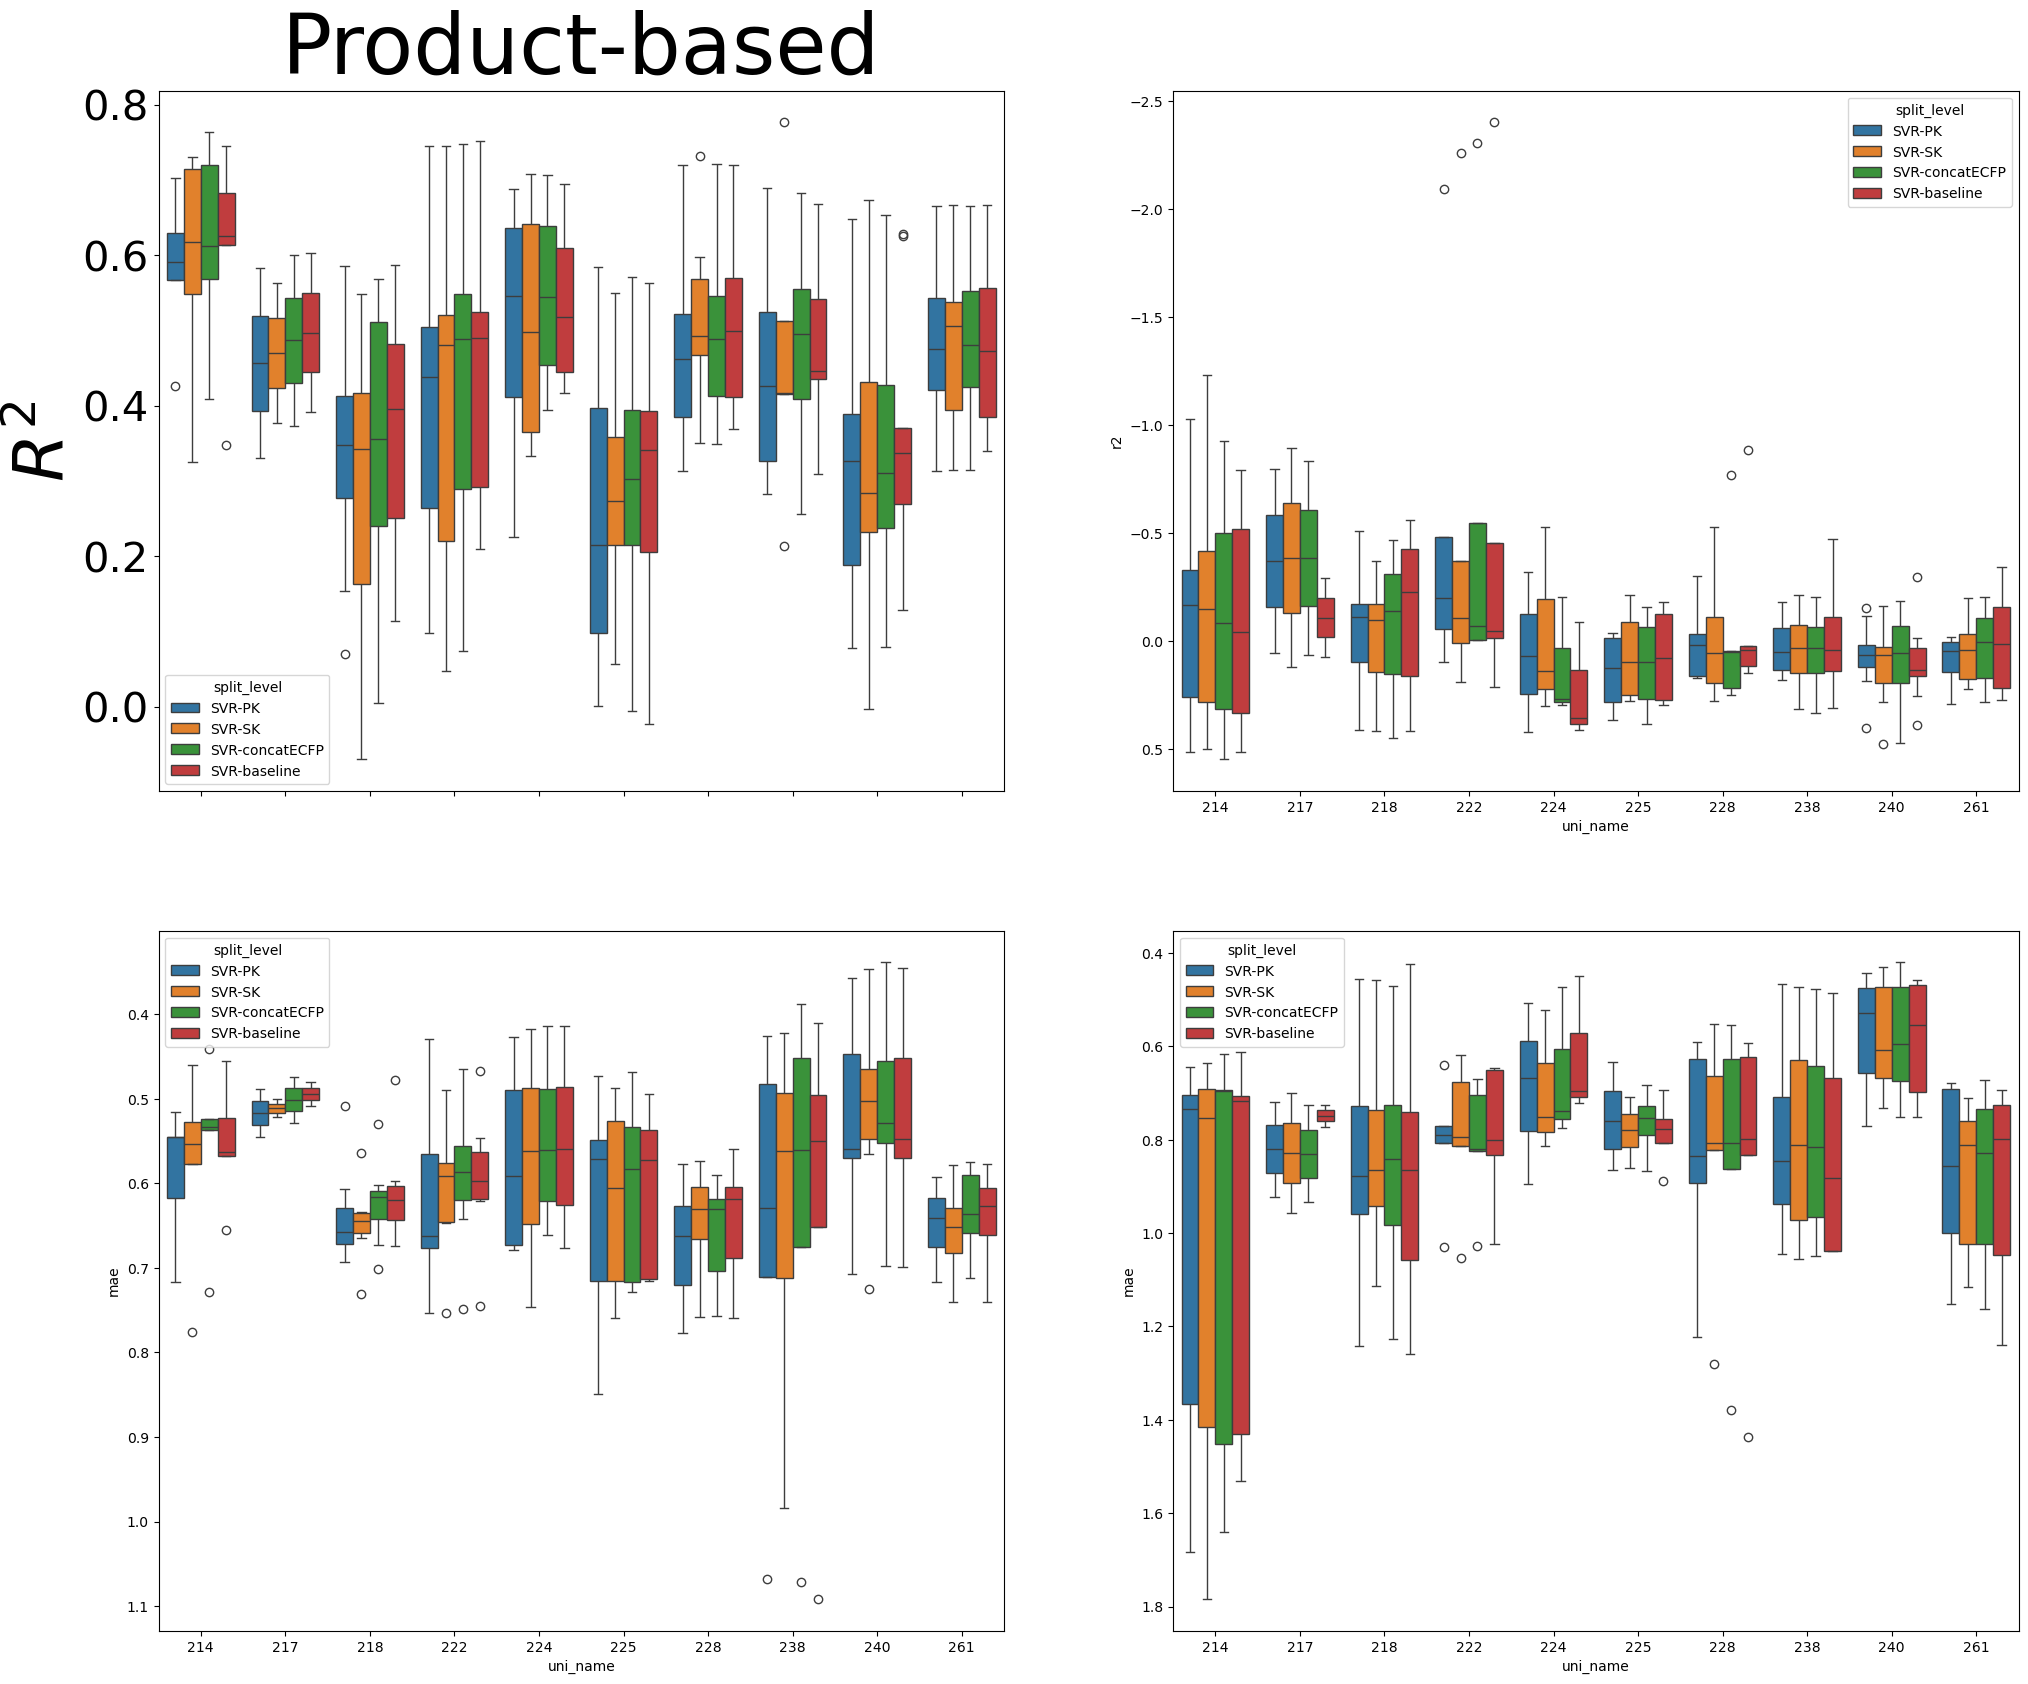

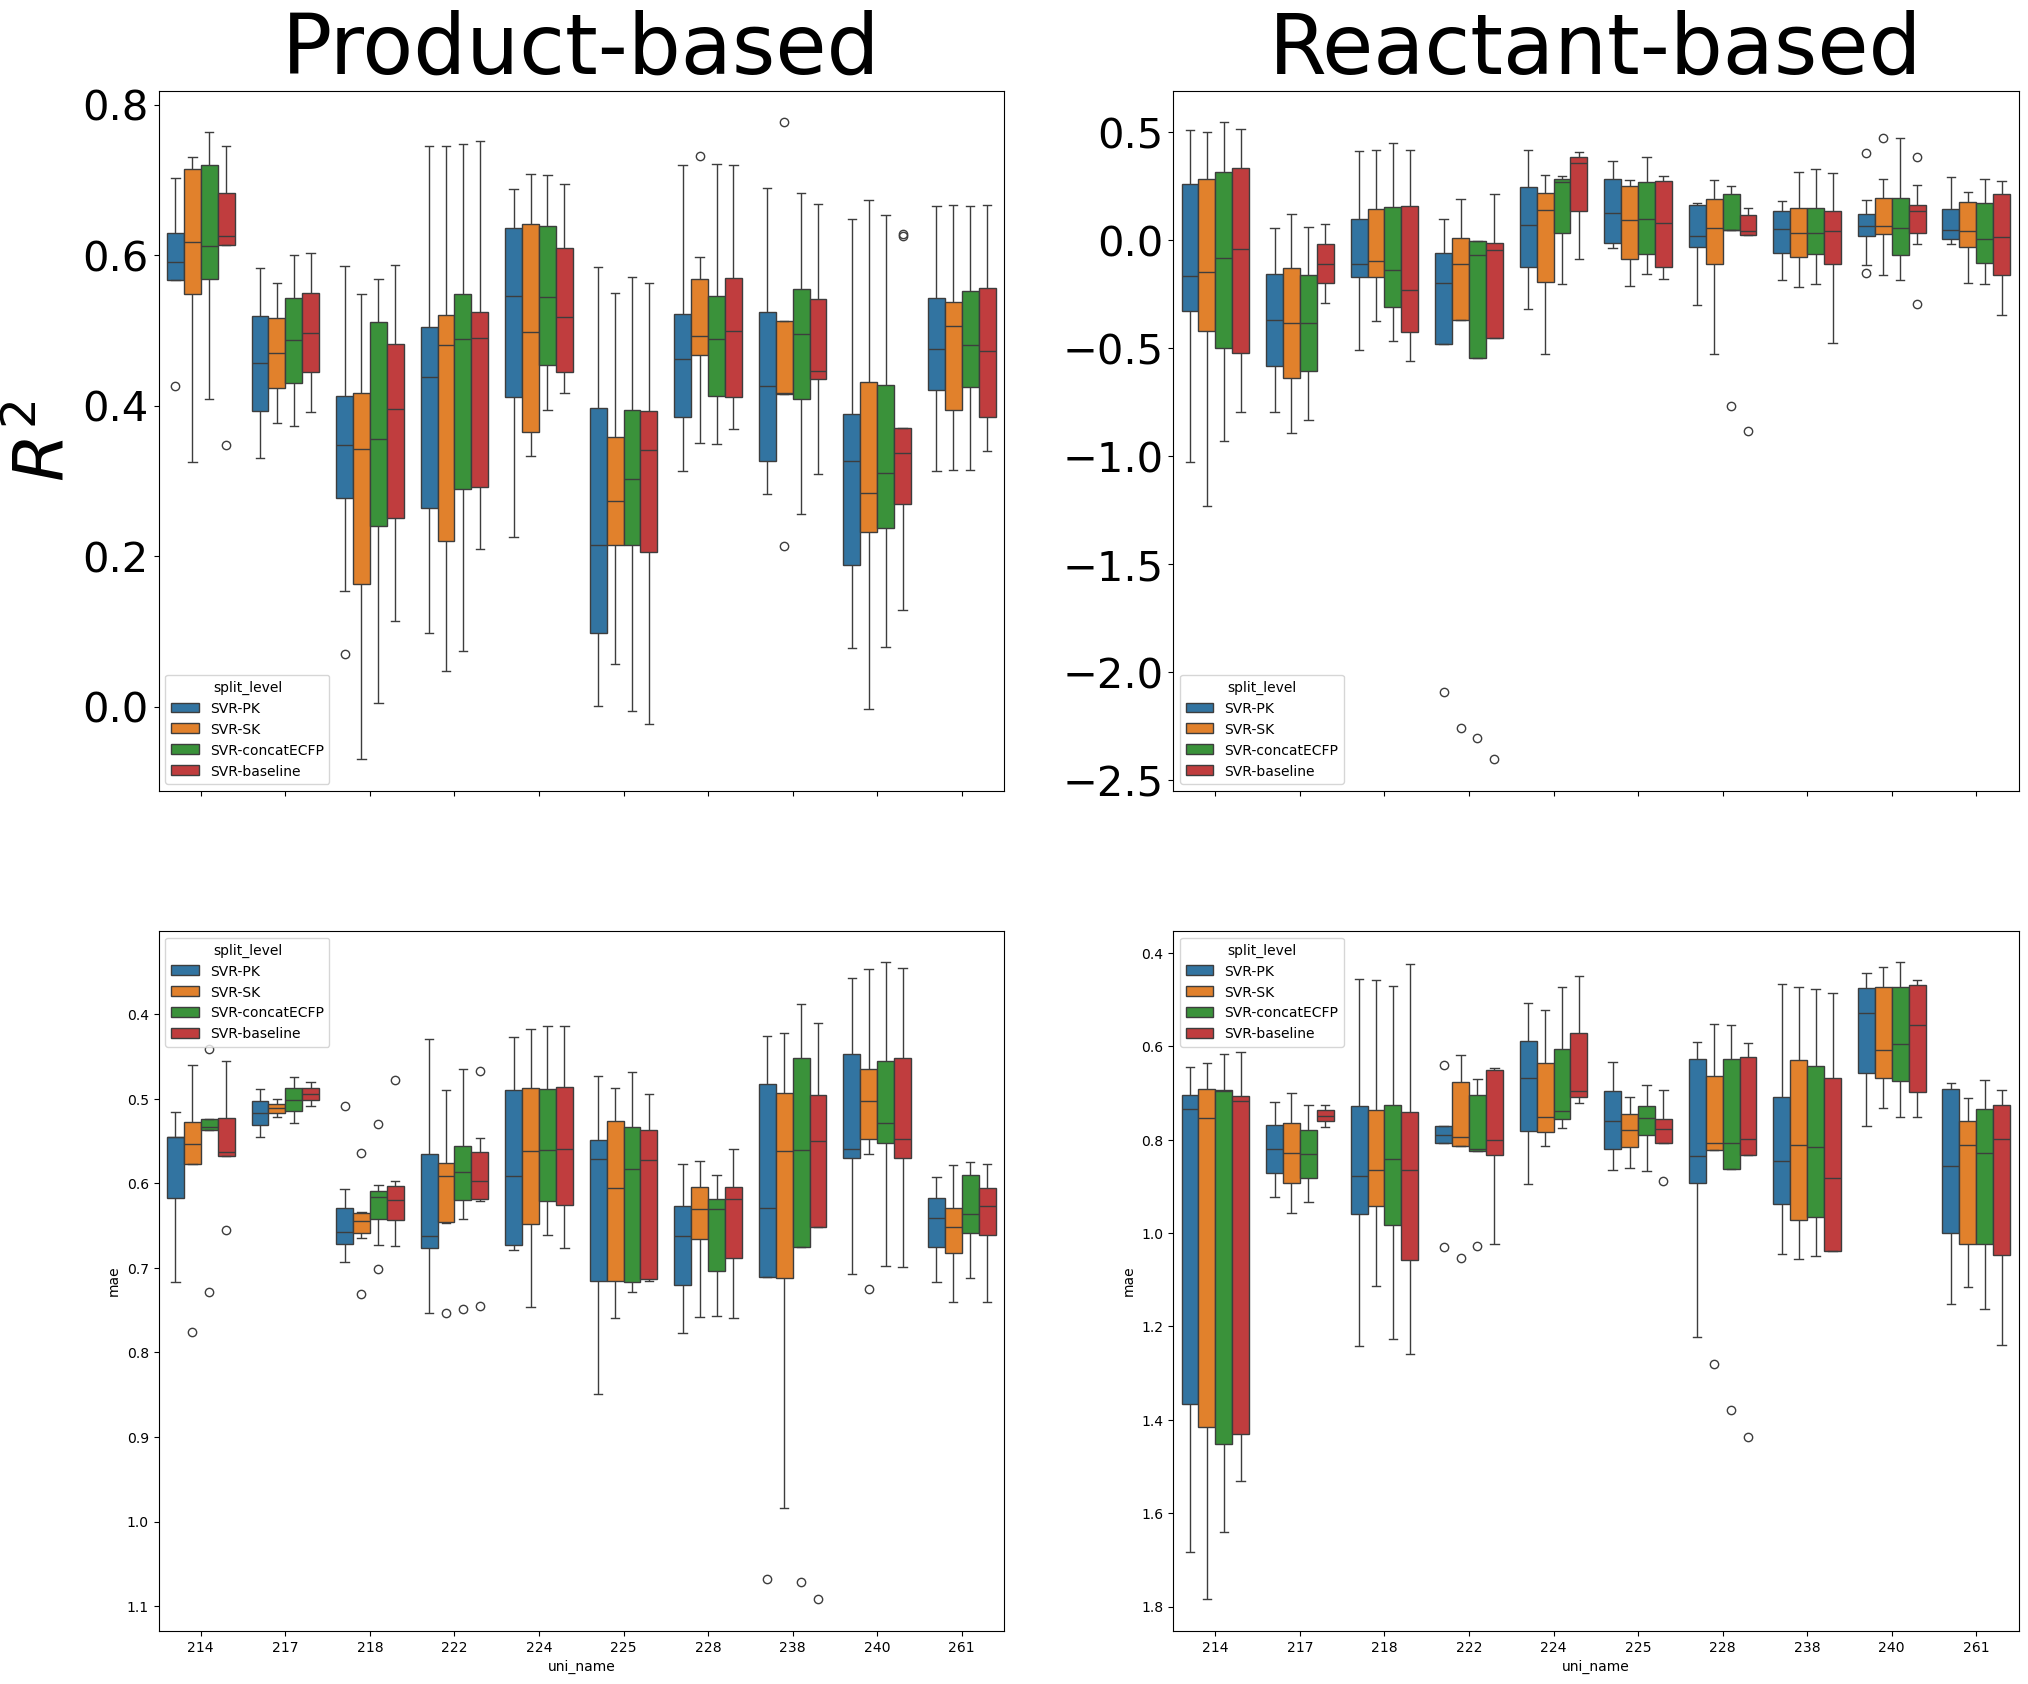

In [2]:
from utils.analysis import load_config, process_files, plot_results
config_file_path = './config/chembl_config_lv1_augment.json'
confs = load_config(config_file_path)
files = confs["files"]
split_levels = [1, 2]
prediction_levels = [f'prediction_level{spl}' for spl in split_levels]

res_dfs = process_files(confs, files, prediction_levels, split_levels)
plot_results(res_dfs, split_levels, 'outputs/statistic_analysis_of_objectives_aug.png')

This cell analyzes the difference between MolCLR and SVR in product dataset.

In [8]:
from utils.analysis import os, pd, load_config, dirnameextractor, dfconcatinatorwithlabel, save_to_excel
def process_mlr_files_only(confs, files, prediction_levels, split_levels, rxns):
    """Process prediction files and organize results."""
    res_dict = {pslv: {} for pslv in prediction_levels}
    for file in files:
        file_uni_name = os.path.split(file)[-1].rsplit('.', 1)[0]
        for pslv, split_level in zip(prediction_levels, split_levels):
            confs['split_level'] = split_level
            pred_dir, _, _ = dirnameextractor('./outputs/prediction', confs)
            pred_dir = os.path.join(pred_dir, file_uni_name)
            res_prd_mlr = pd.read_csv(f'{pred_dir}/prd_molclr_scores.csv', header=0, index_col=None).sort_index()
            res_prd_mlr.rename(columns={'Unnamed: 0': 'dataset'}, inplace=True)
            rdict = {
                'MolCLR': res_prd_mlr,
            }
            rdf = dfconcatinatorwithlabel(rdict, 'split_level')
            res_dict[pslv][file_uni_name] = rdf.copy()
    dfs = {key: dfconcatinatorwithlabel(rd, 'uni_name').dropna() for key, rd in res_dict.items()}
    for key, df in dfs.items():
        df['identifier'] = [f'{idx}_{rxn}' for idx, rxn in zip(df['uni_name'], df['dataset'])]
        df['Reaction set ID'] = [rxns.loc[id, 'Reation set ID'] for id in df['identifier']]
        df.sort_values(by=['Reaction set ID'], inplace=True)
        dfs[key] = df
    return dfs

config_file_path = './config/chembl_config_lv1.json'
confs = load_config(config_file_path)
files = confs["files"]
split_levels = [1, 2]
prediction_levels = [f'prediction_level{spl}' for spl in split_levels]

rxns = pd.read_table('./chembl31/dataset_explanation.tsv', index_col='Identifier', header=0)
res_dfs = process_mlr_files_only(confs, files, prediction_levels, split_levels, rxns)
save_to_excel(res_dfs, './outputs/prediction_results_mlr.xlsx')

/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:457: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=["" for _ in ax.get_xticklabels()])
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:457: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=["" for _ in ax.get_xticklabels()])
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:463: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=fsize)
/home/yuto_i

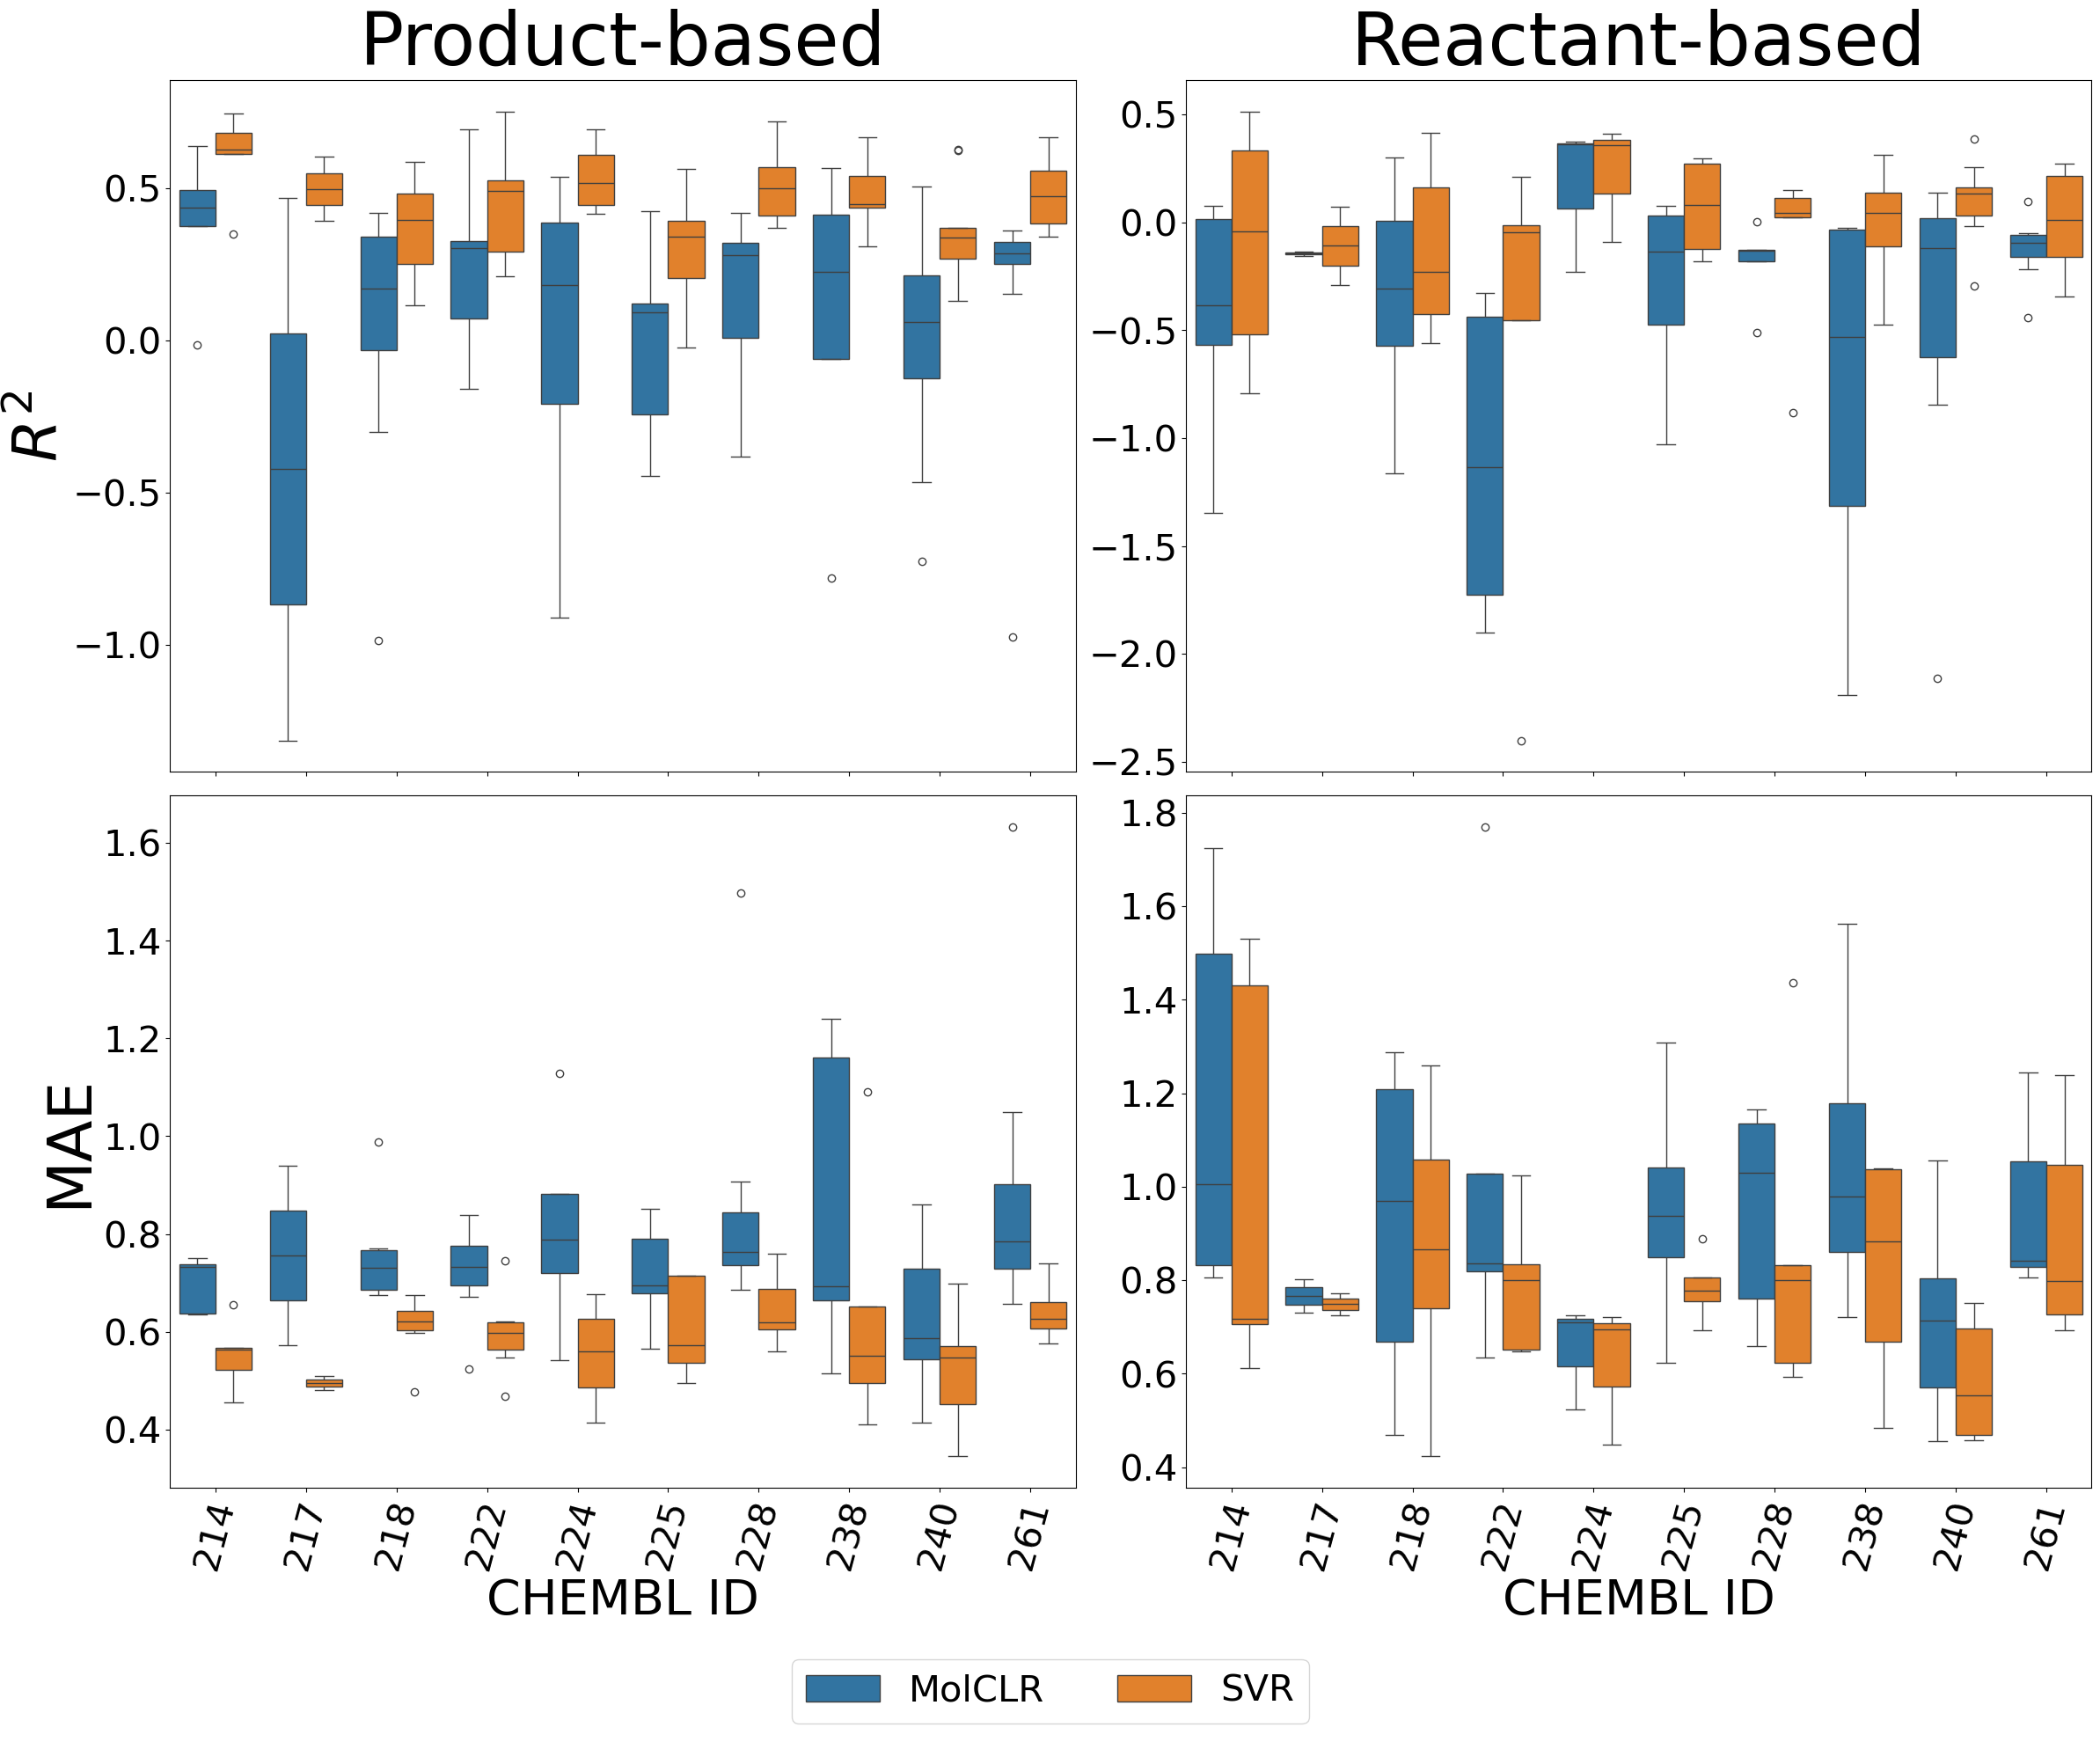

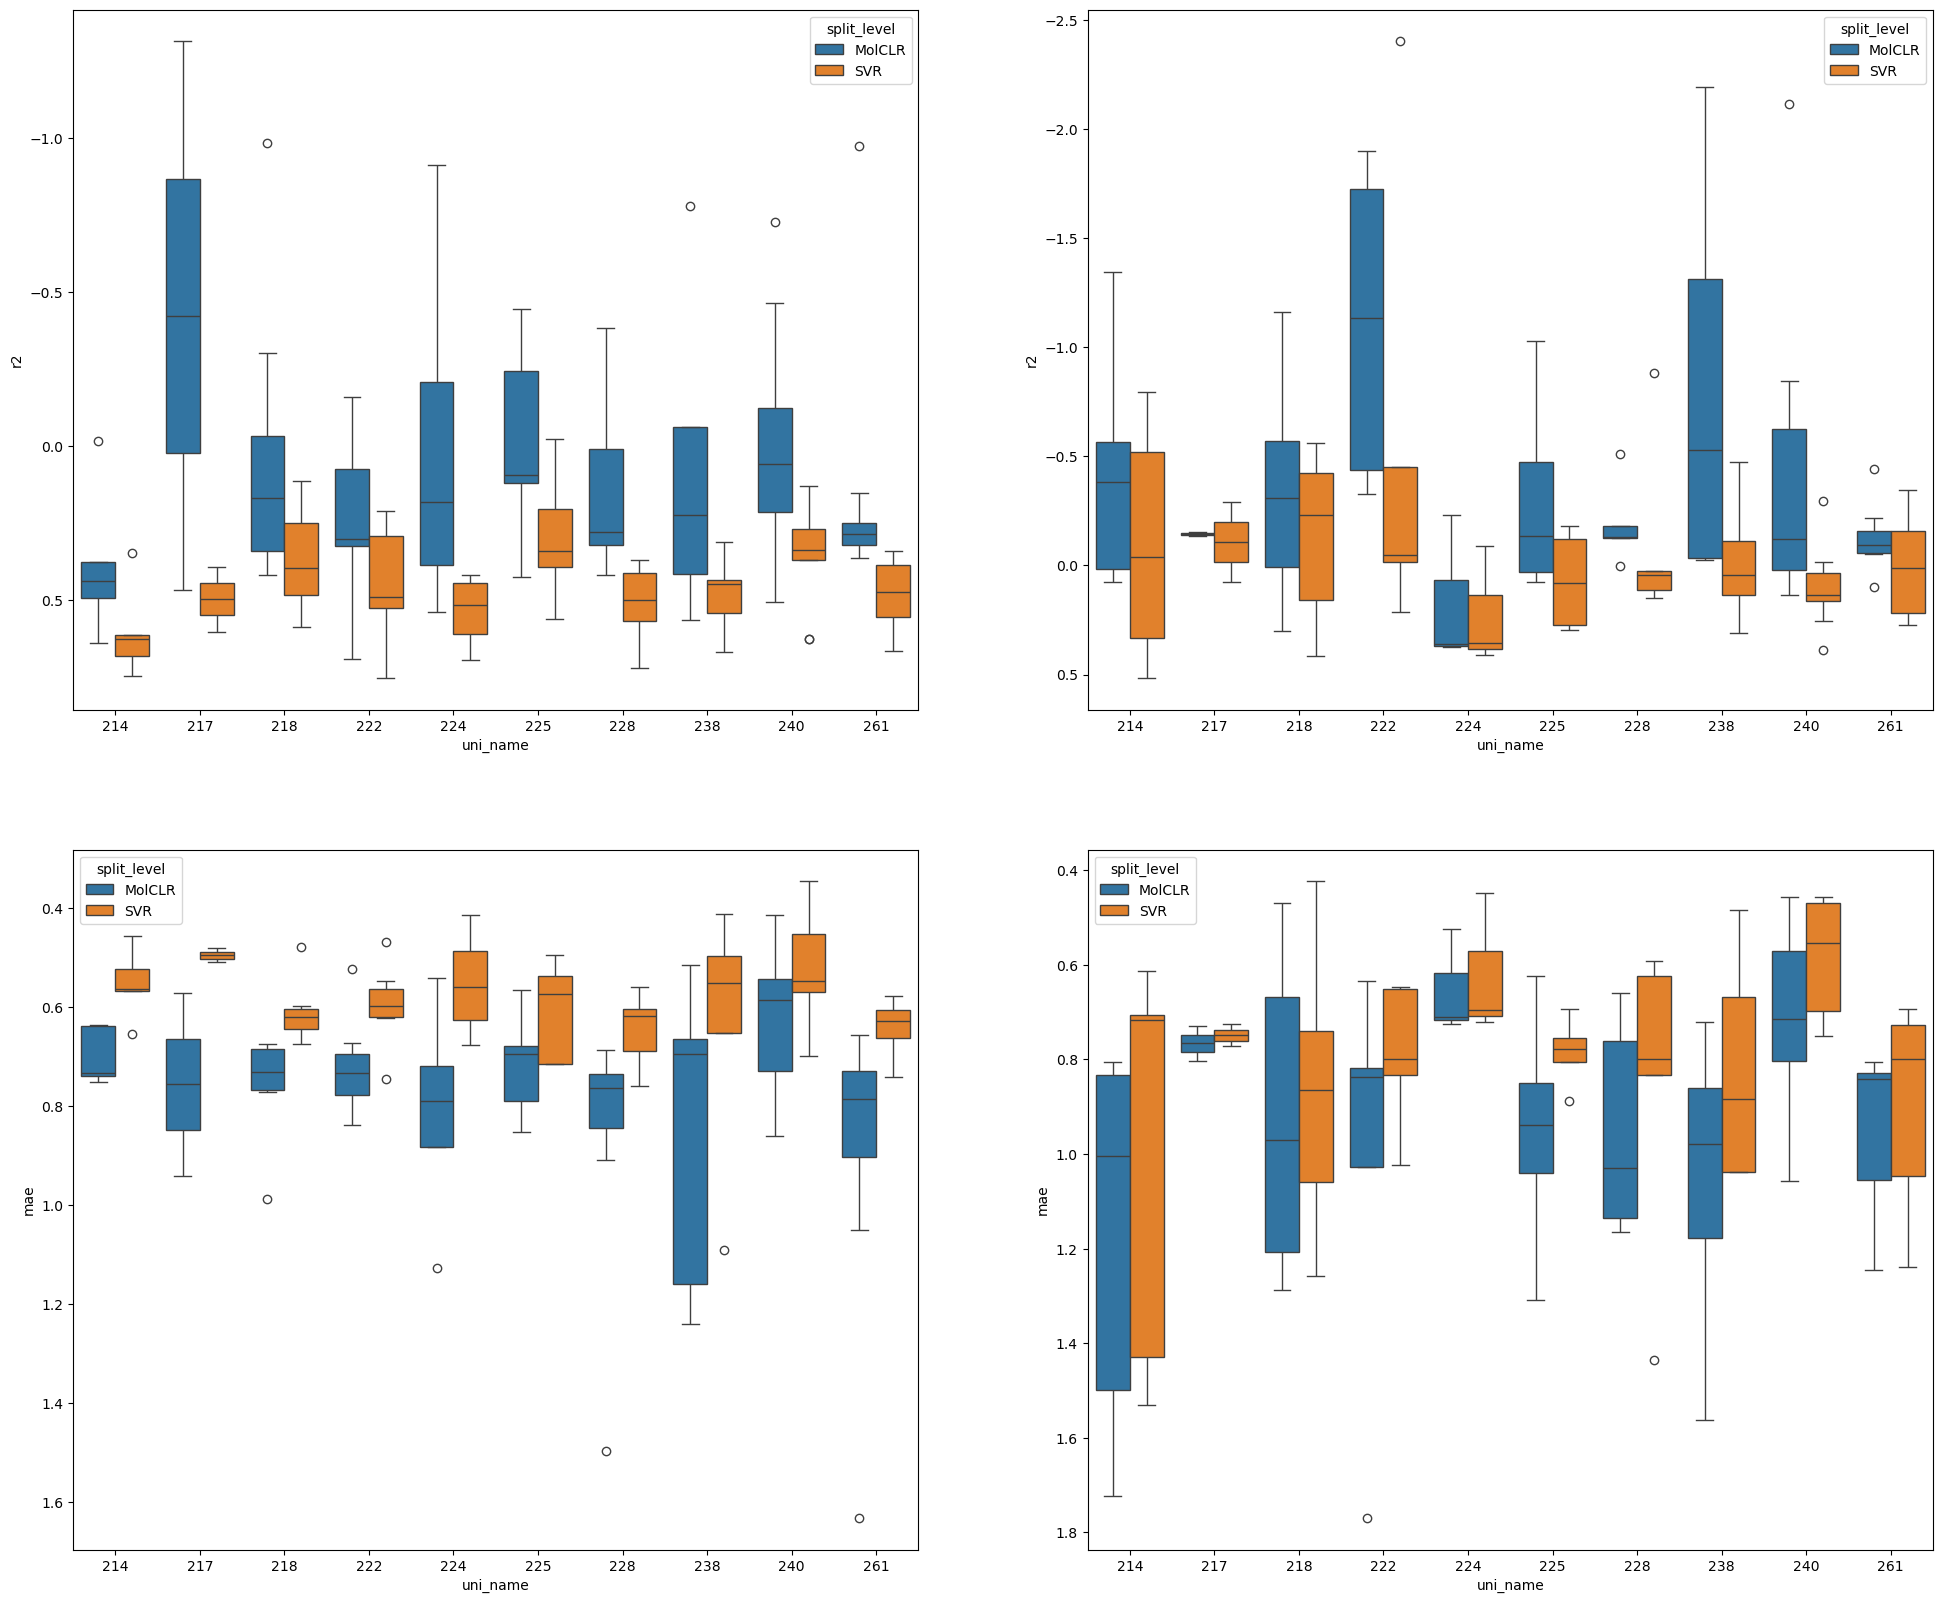

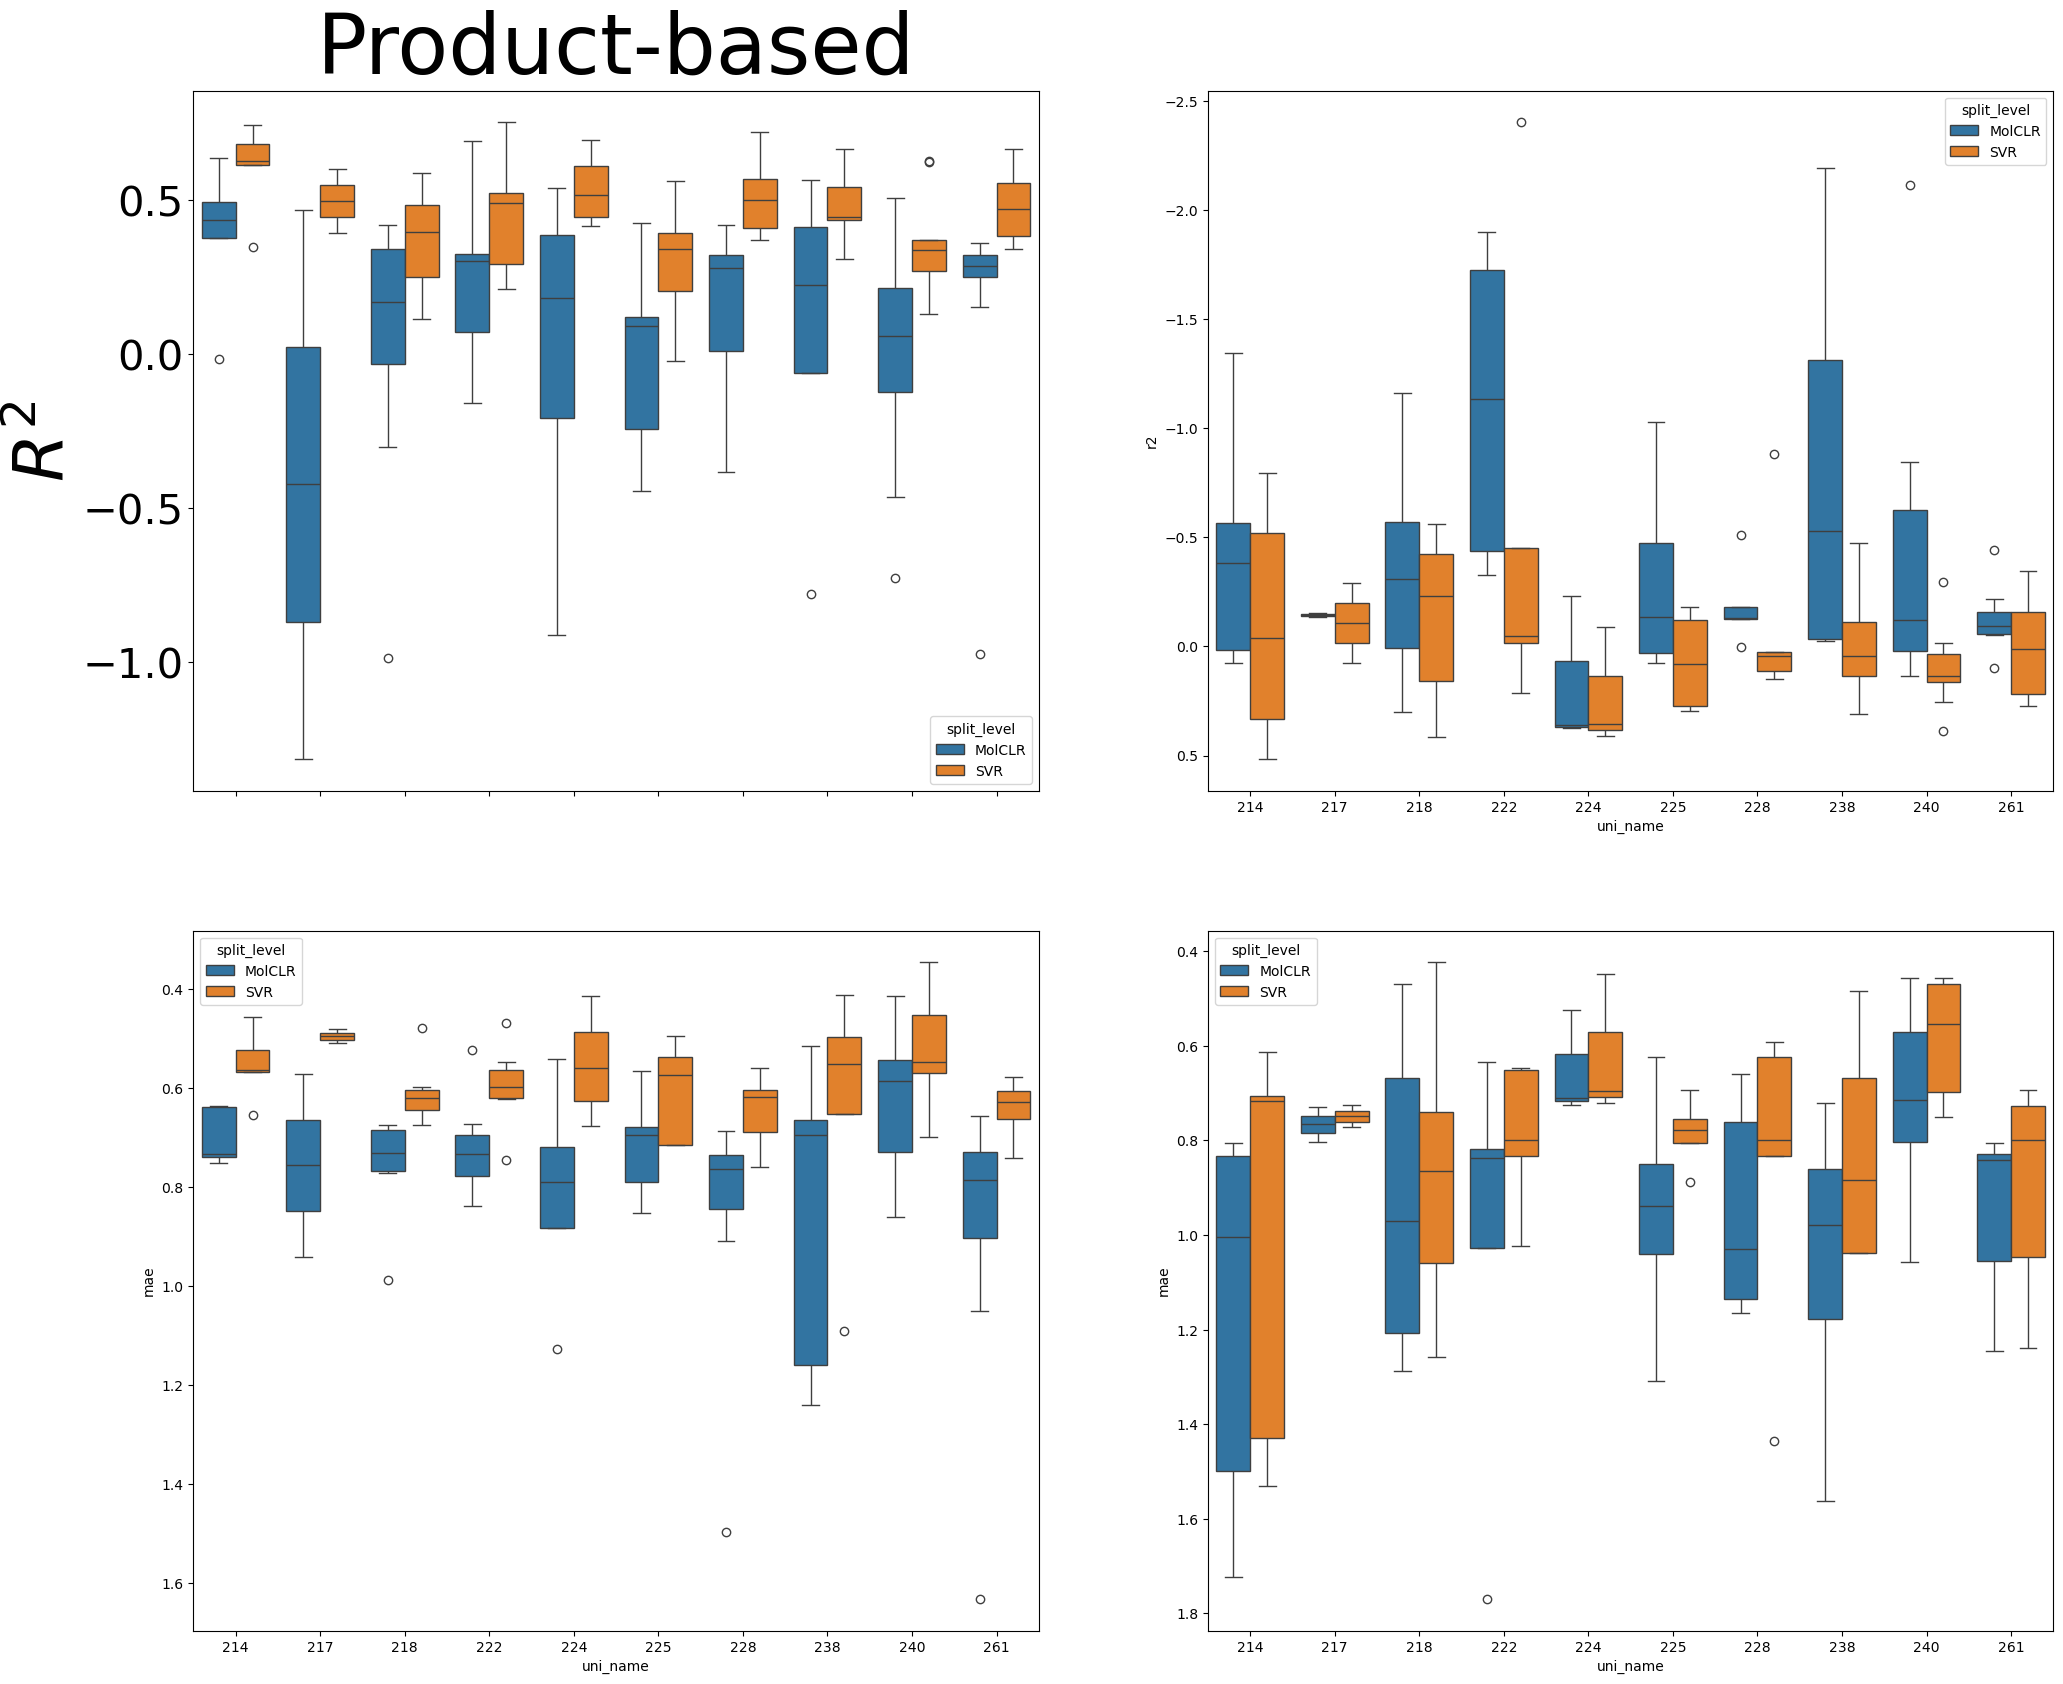

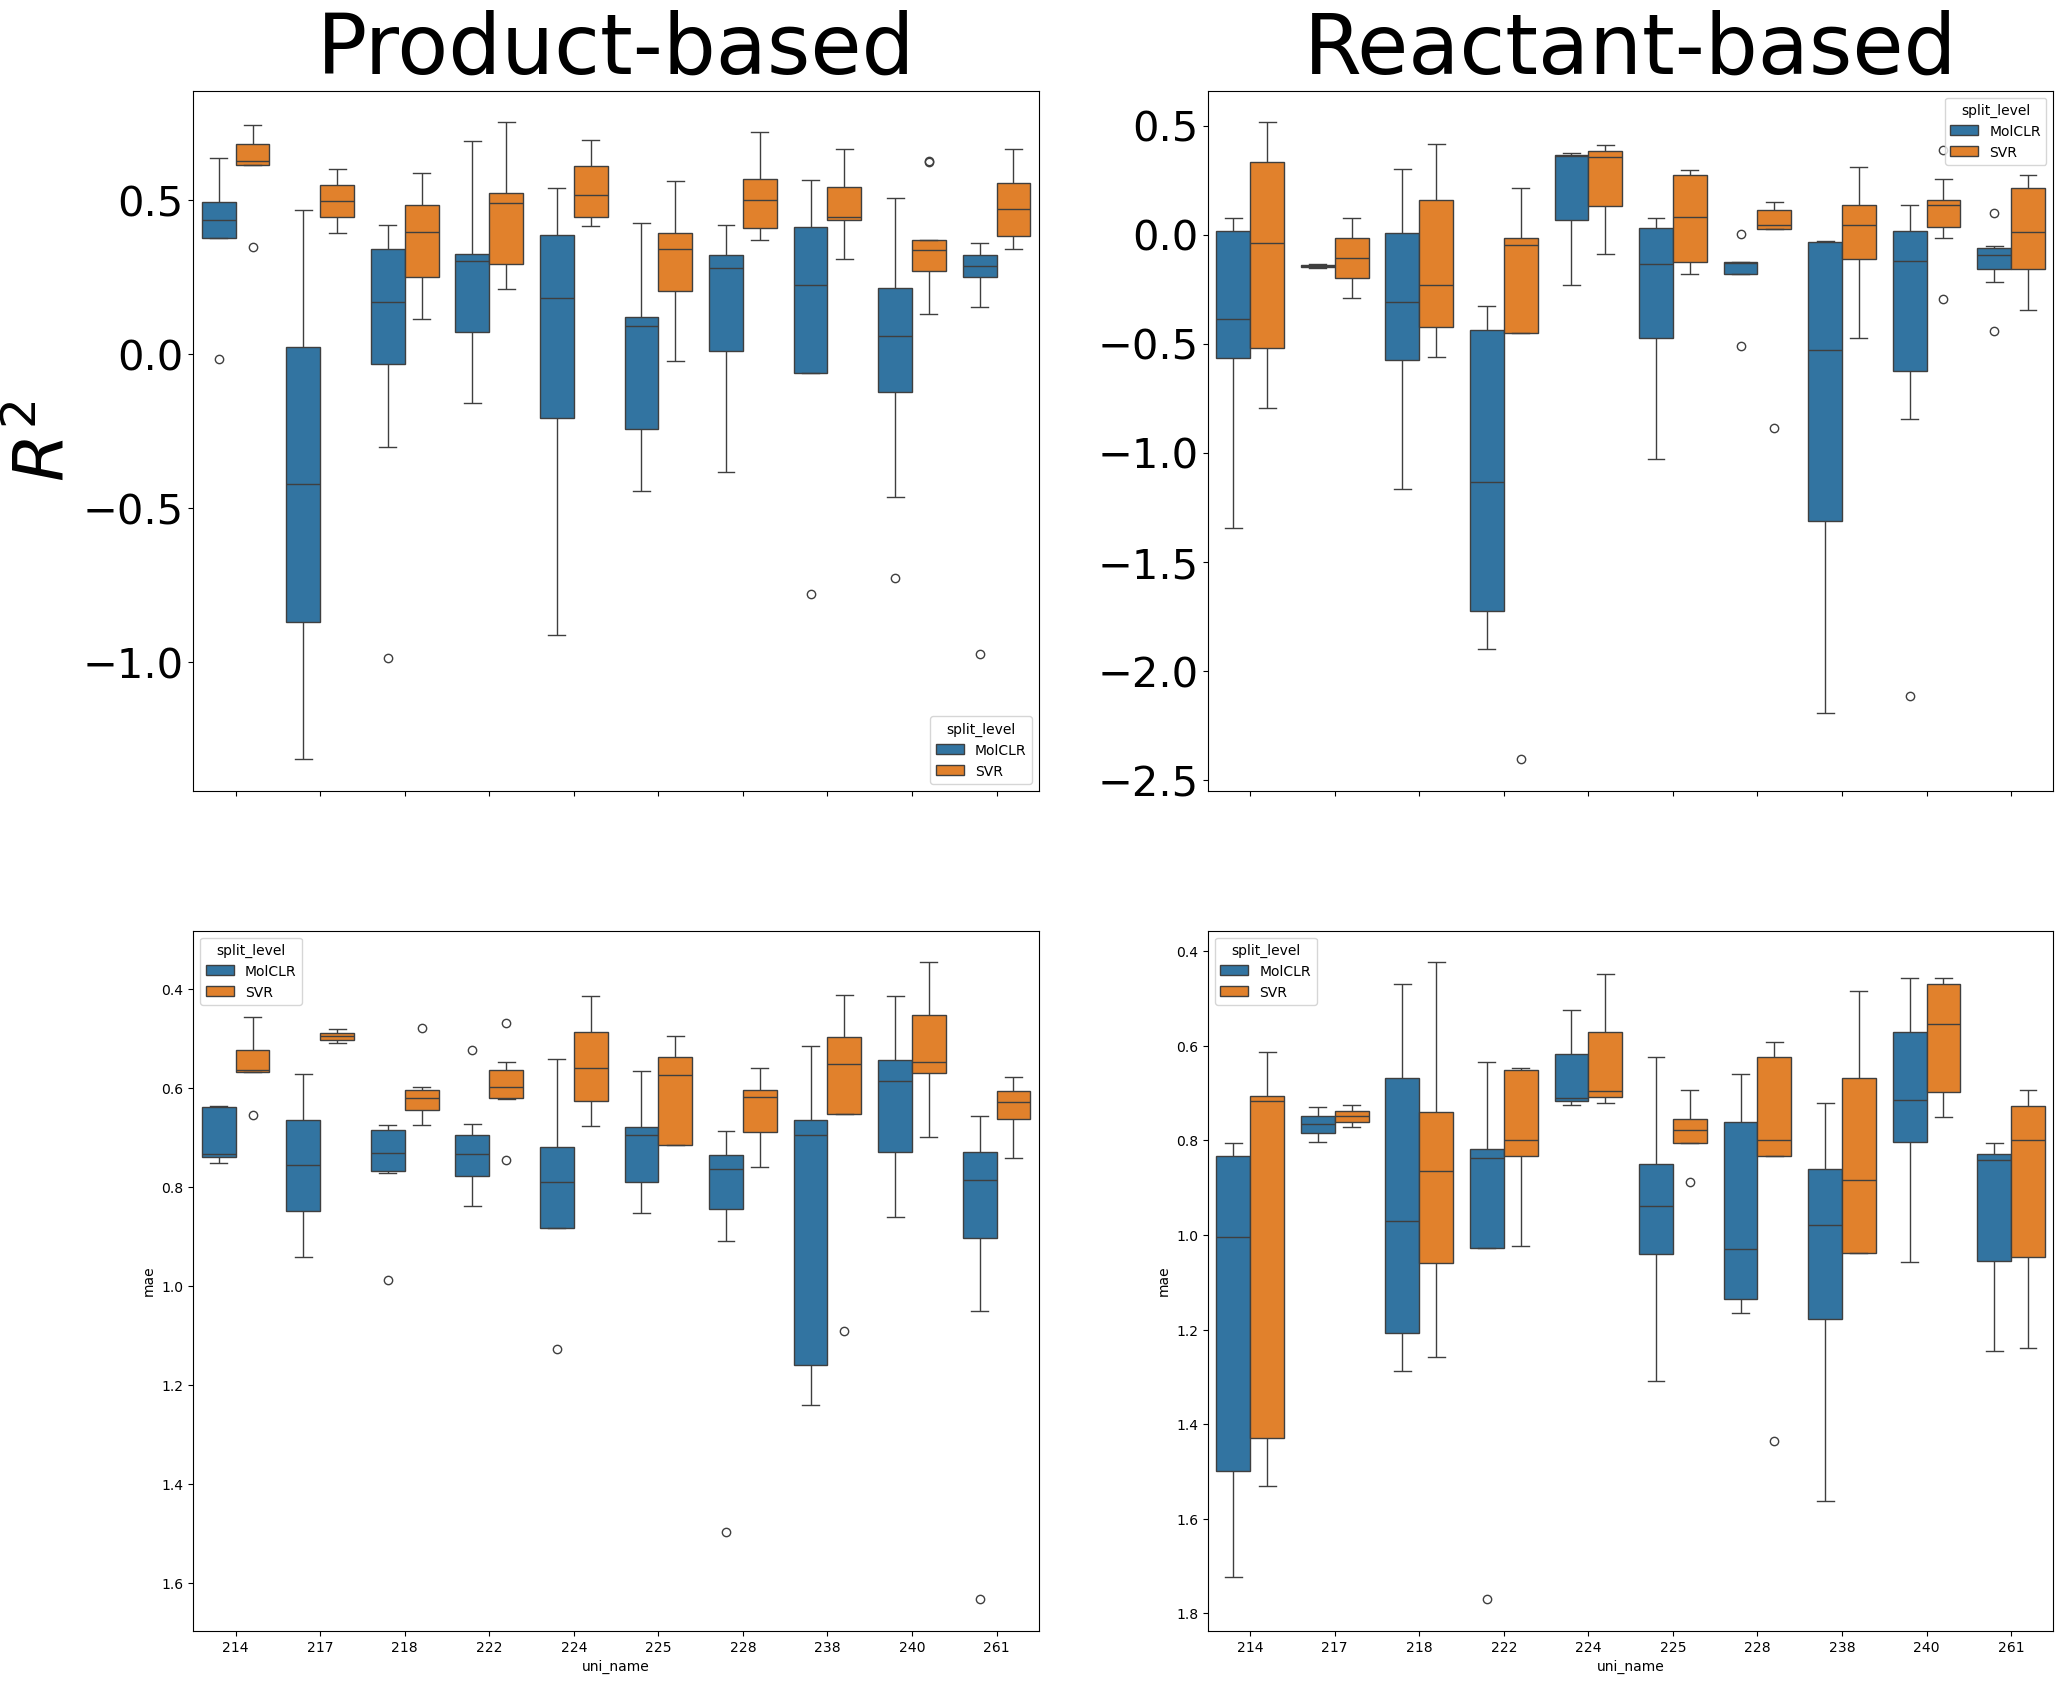

In [9]:
from utils.analysis import load_config, process_mlr_files, plot_mlr_results
config_file_path = './config/chembl_config_lv1.json'
confs = load_config(config_file_path)
files = confs["files"]
split_levels = [1, 2]
prediction_levels = [f'prediction_level{spl}' for spl in split_levels]

res_dfs = process_mlr_files(confs, files, prediction_levels, split_levels)
plot_mlr_results(res_dfs, split_levels, 'outputs/statistic_analysis_of_objectives_mlr.png')

This cell analyzes the influence of augmentation.

/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:529: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=["" for _ in ax.get_xticklabels()])
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:532: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:529: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=["" for _ in ax.get_xticklabels()])
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:535: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=fsize)
/home/yuto_i

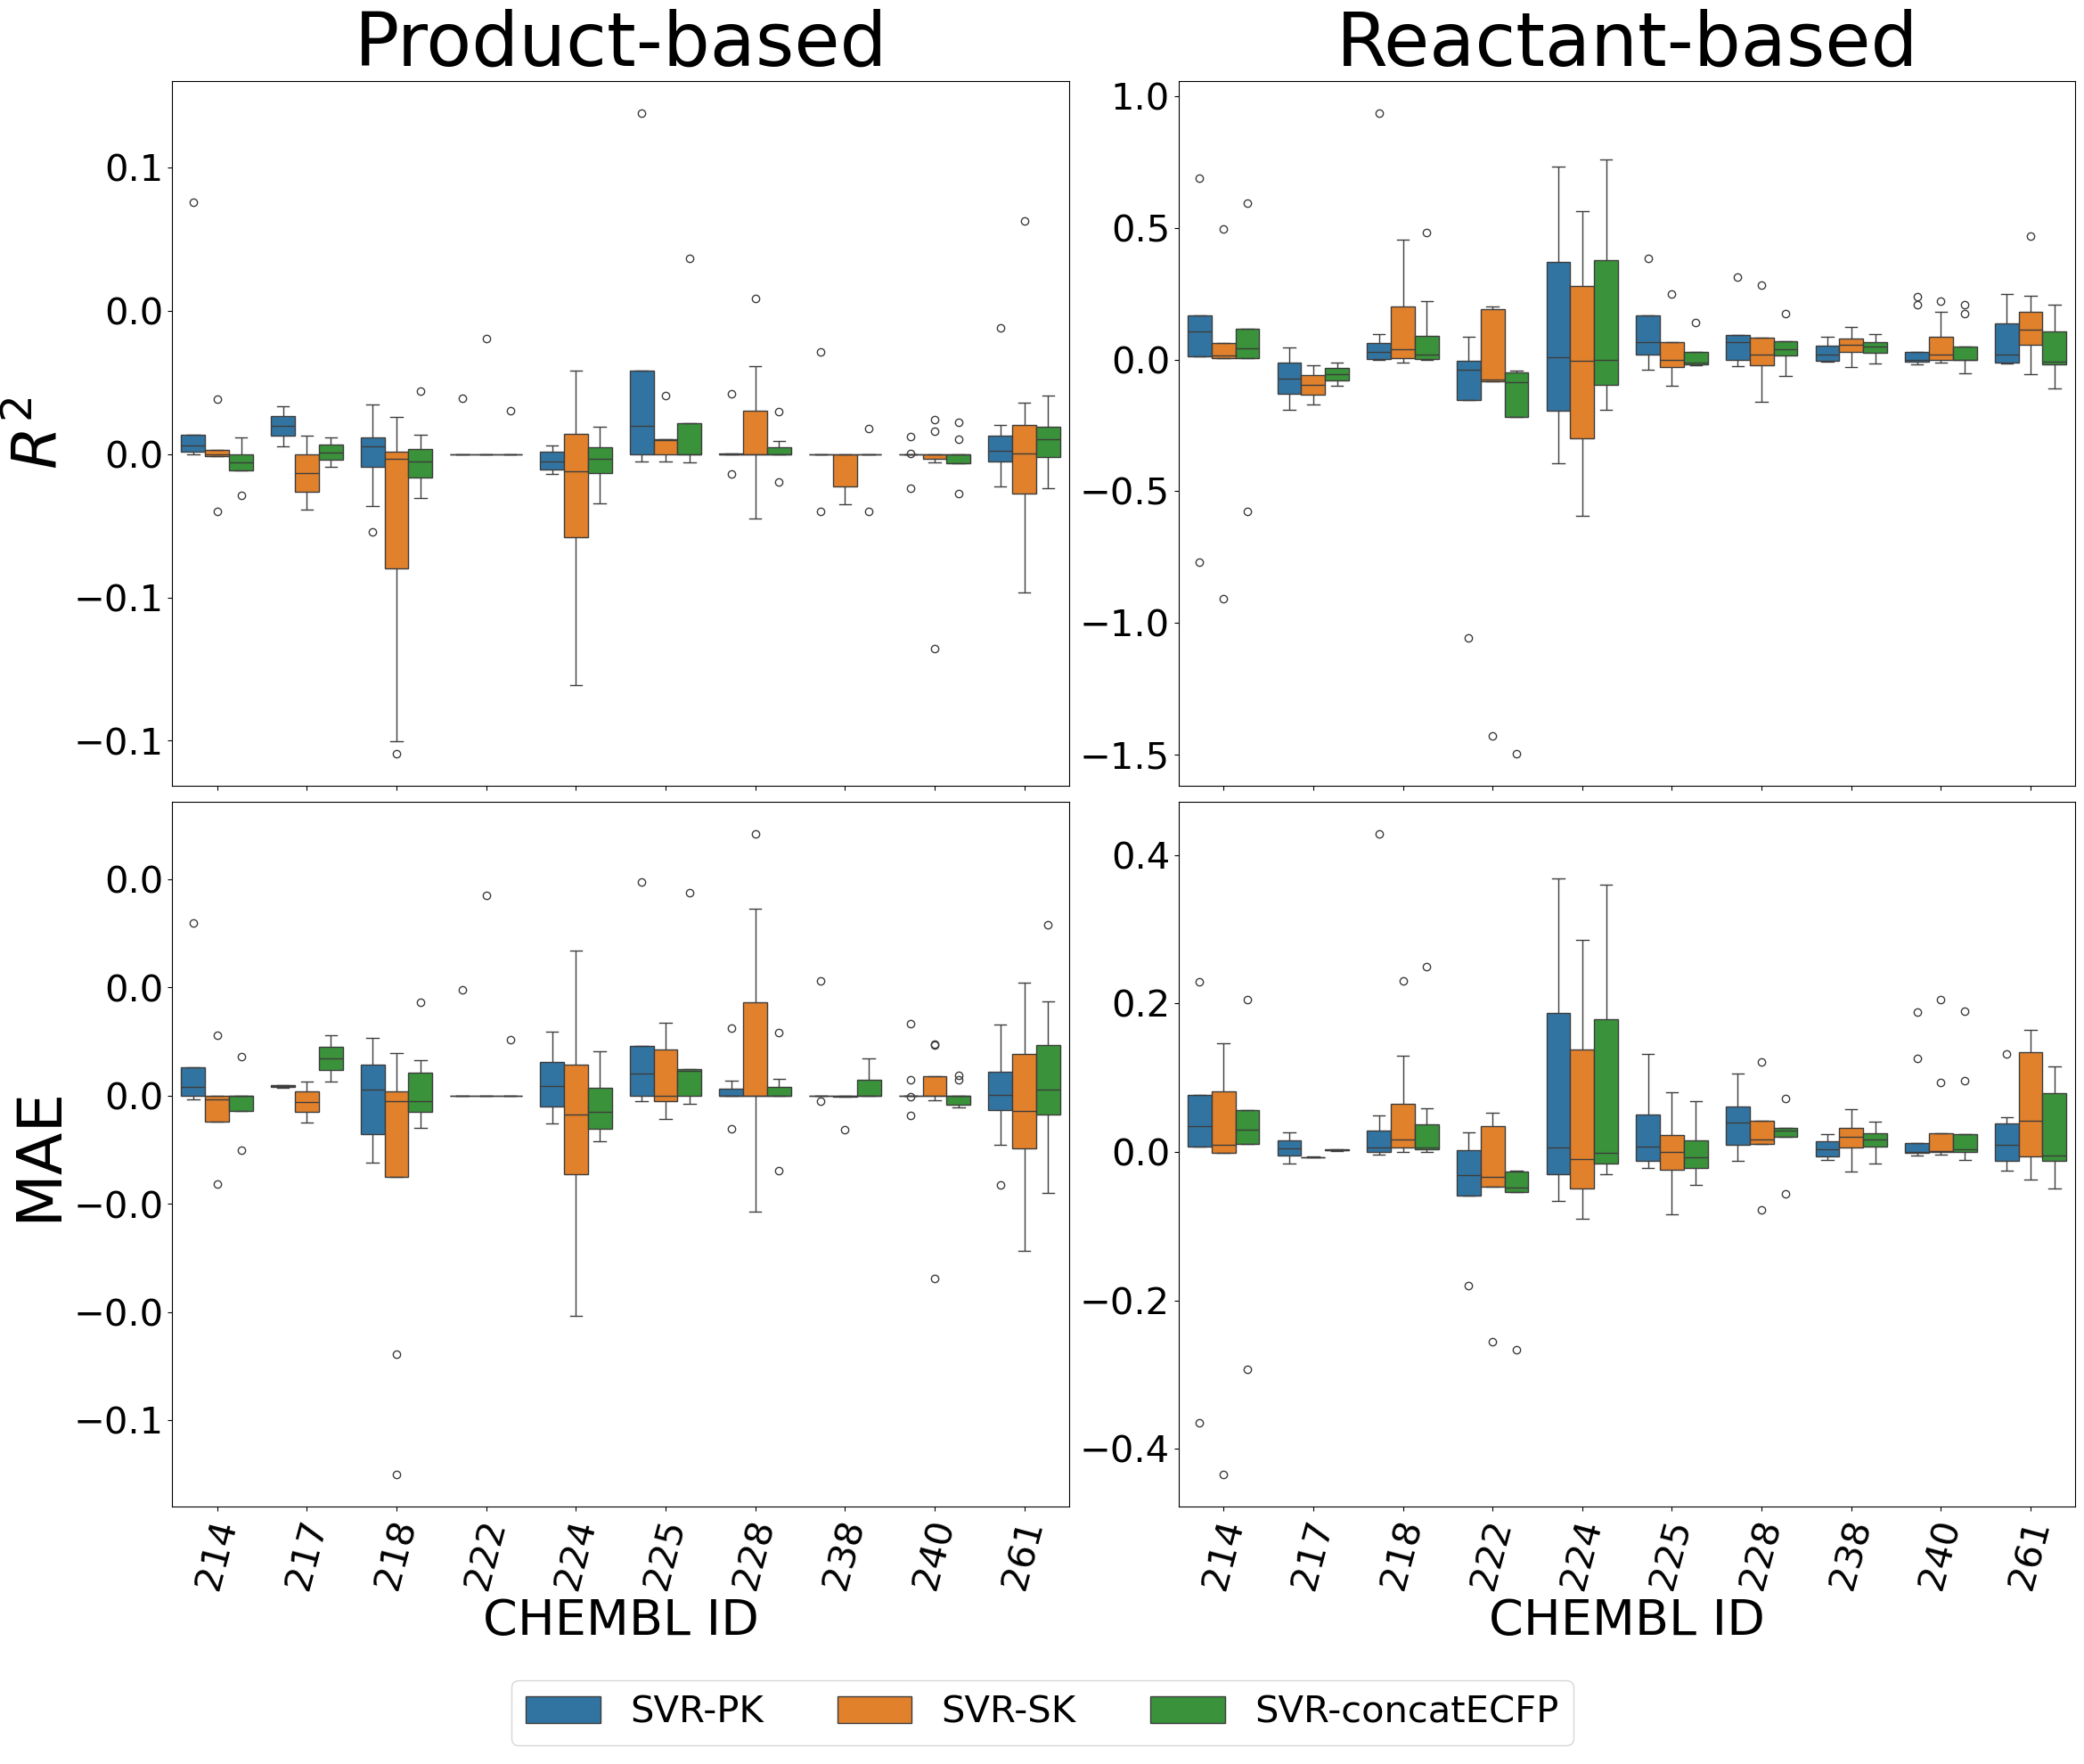

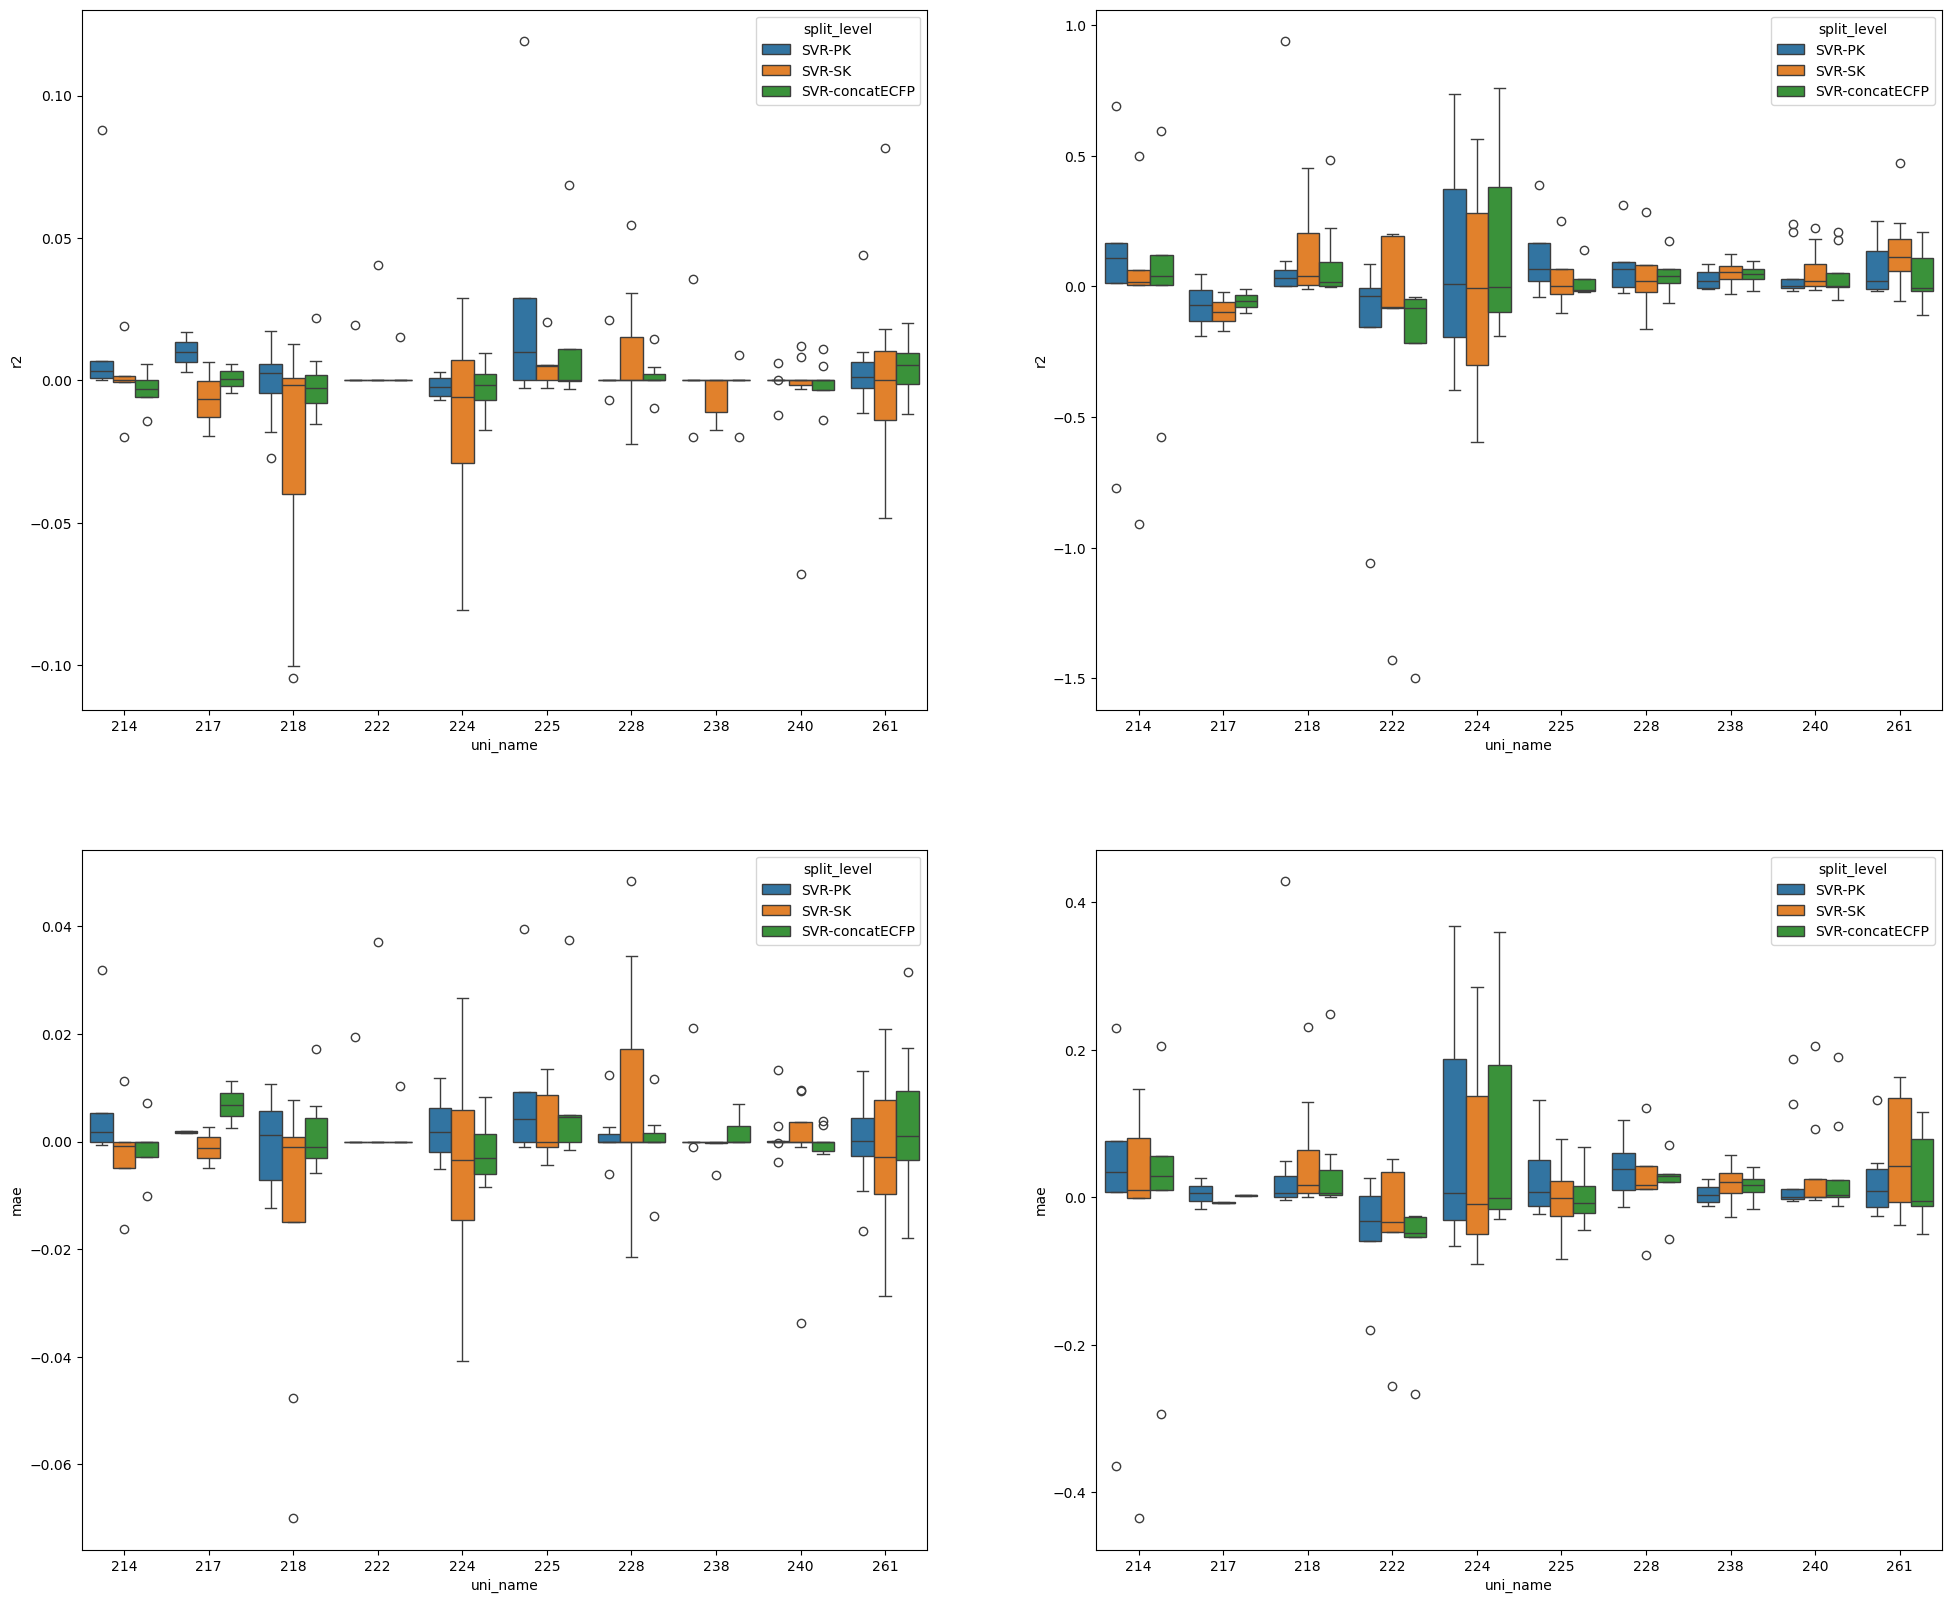

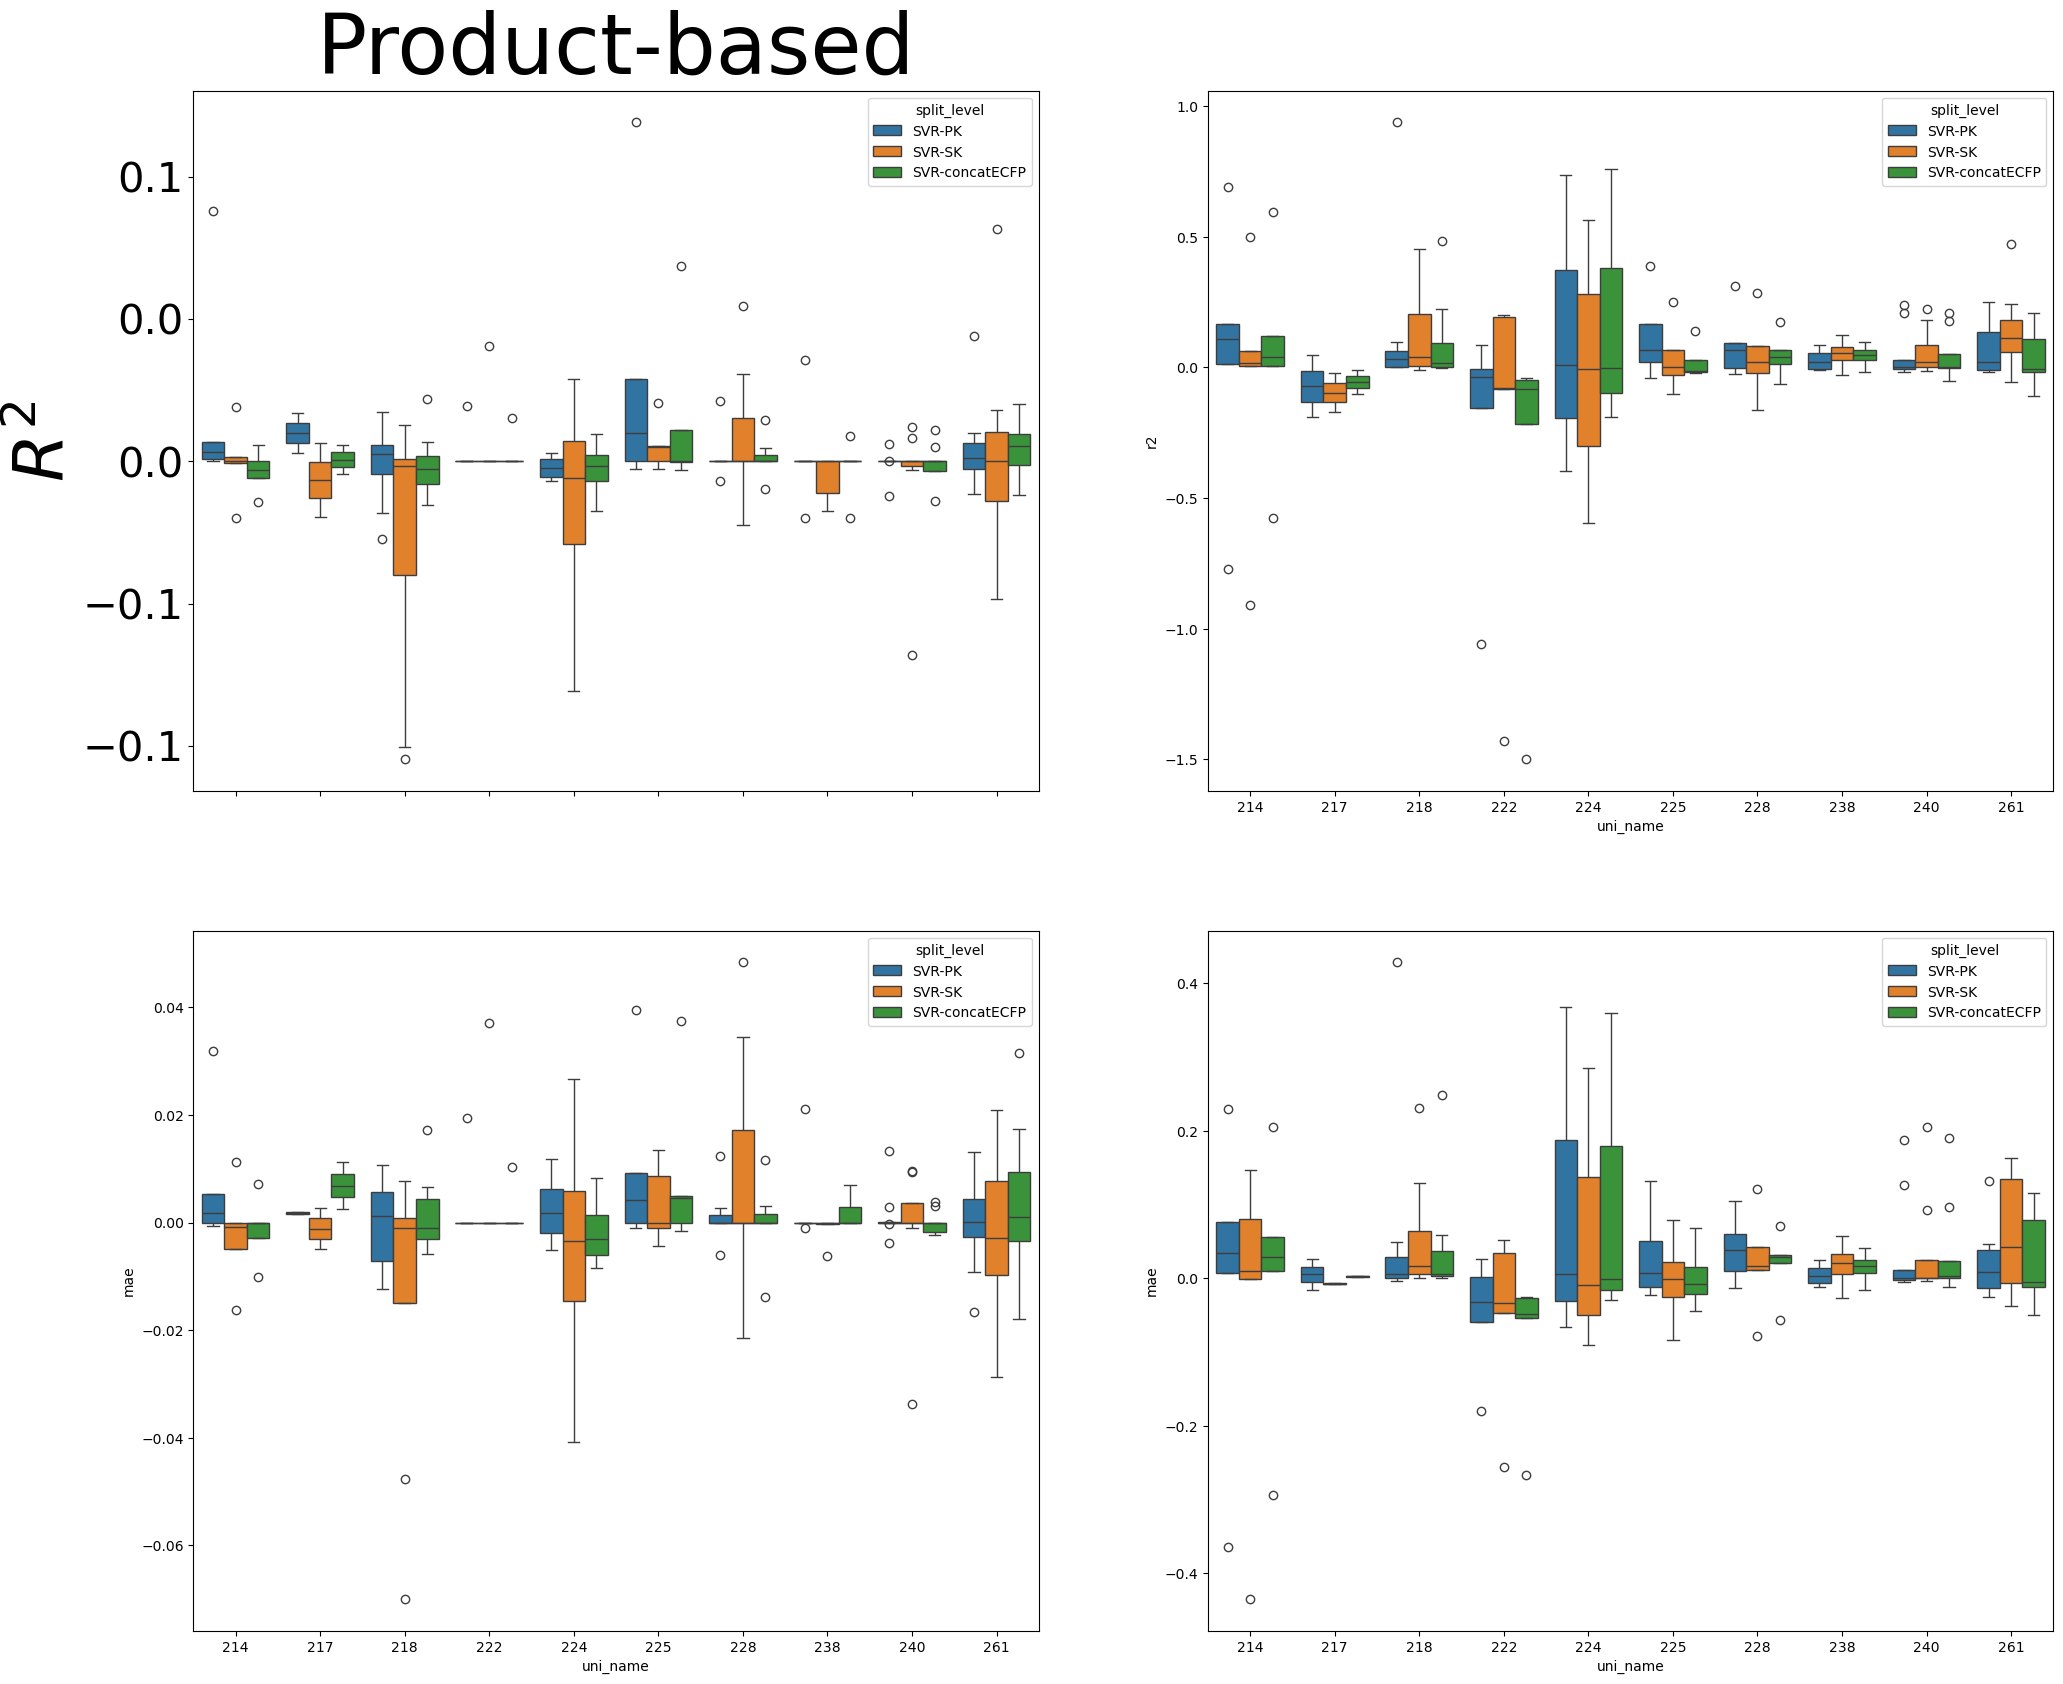

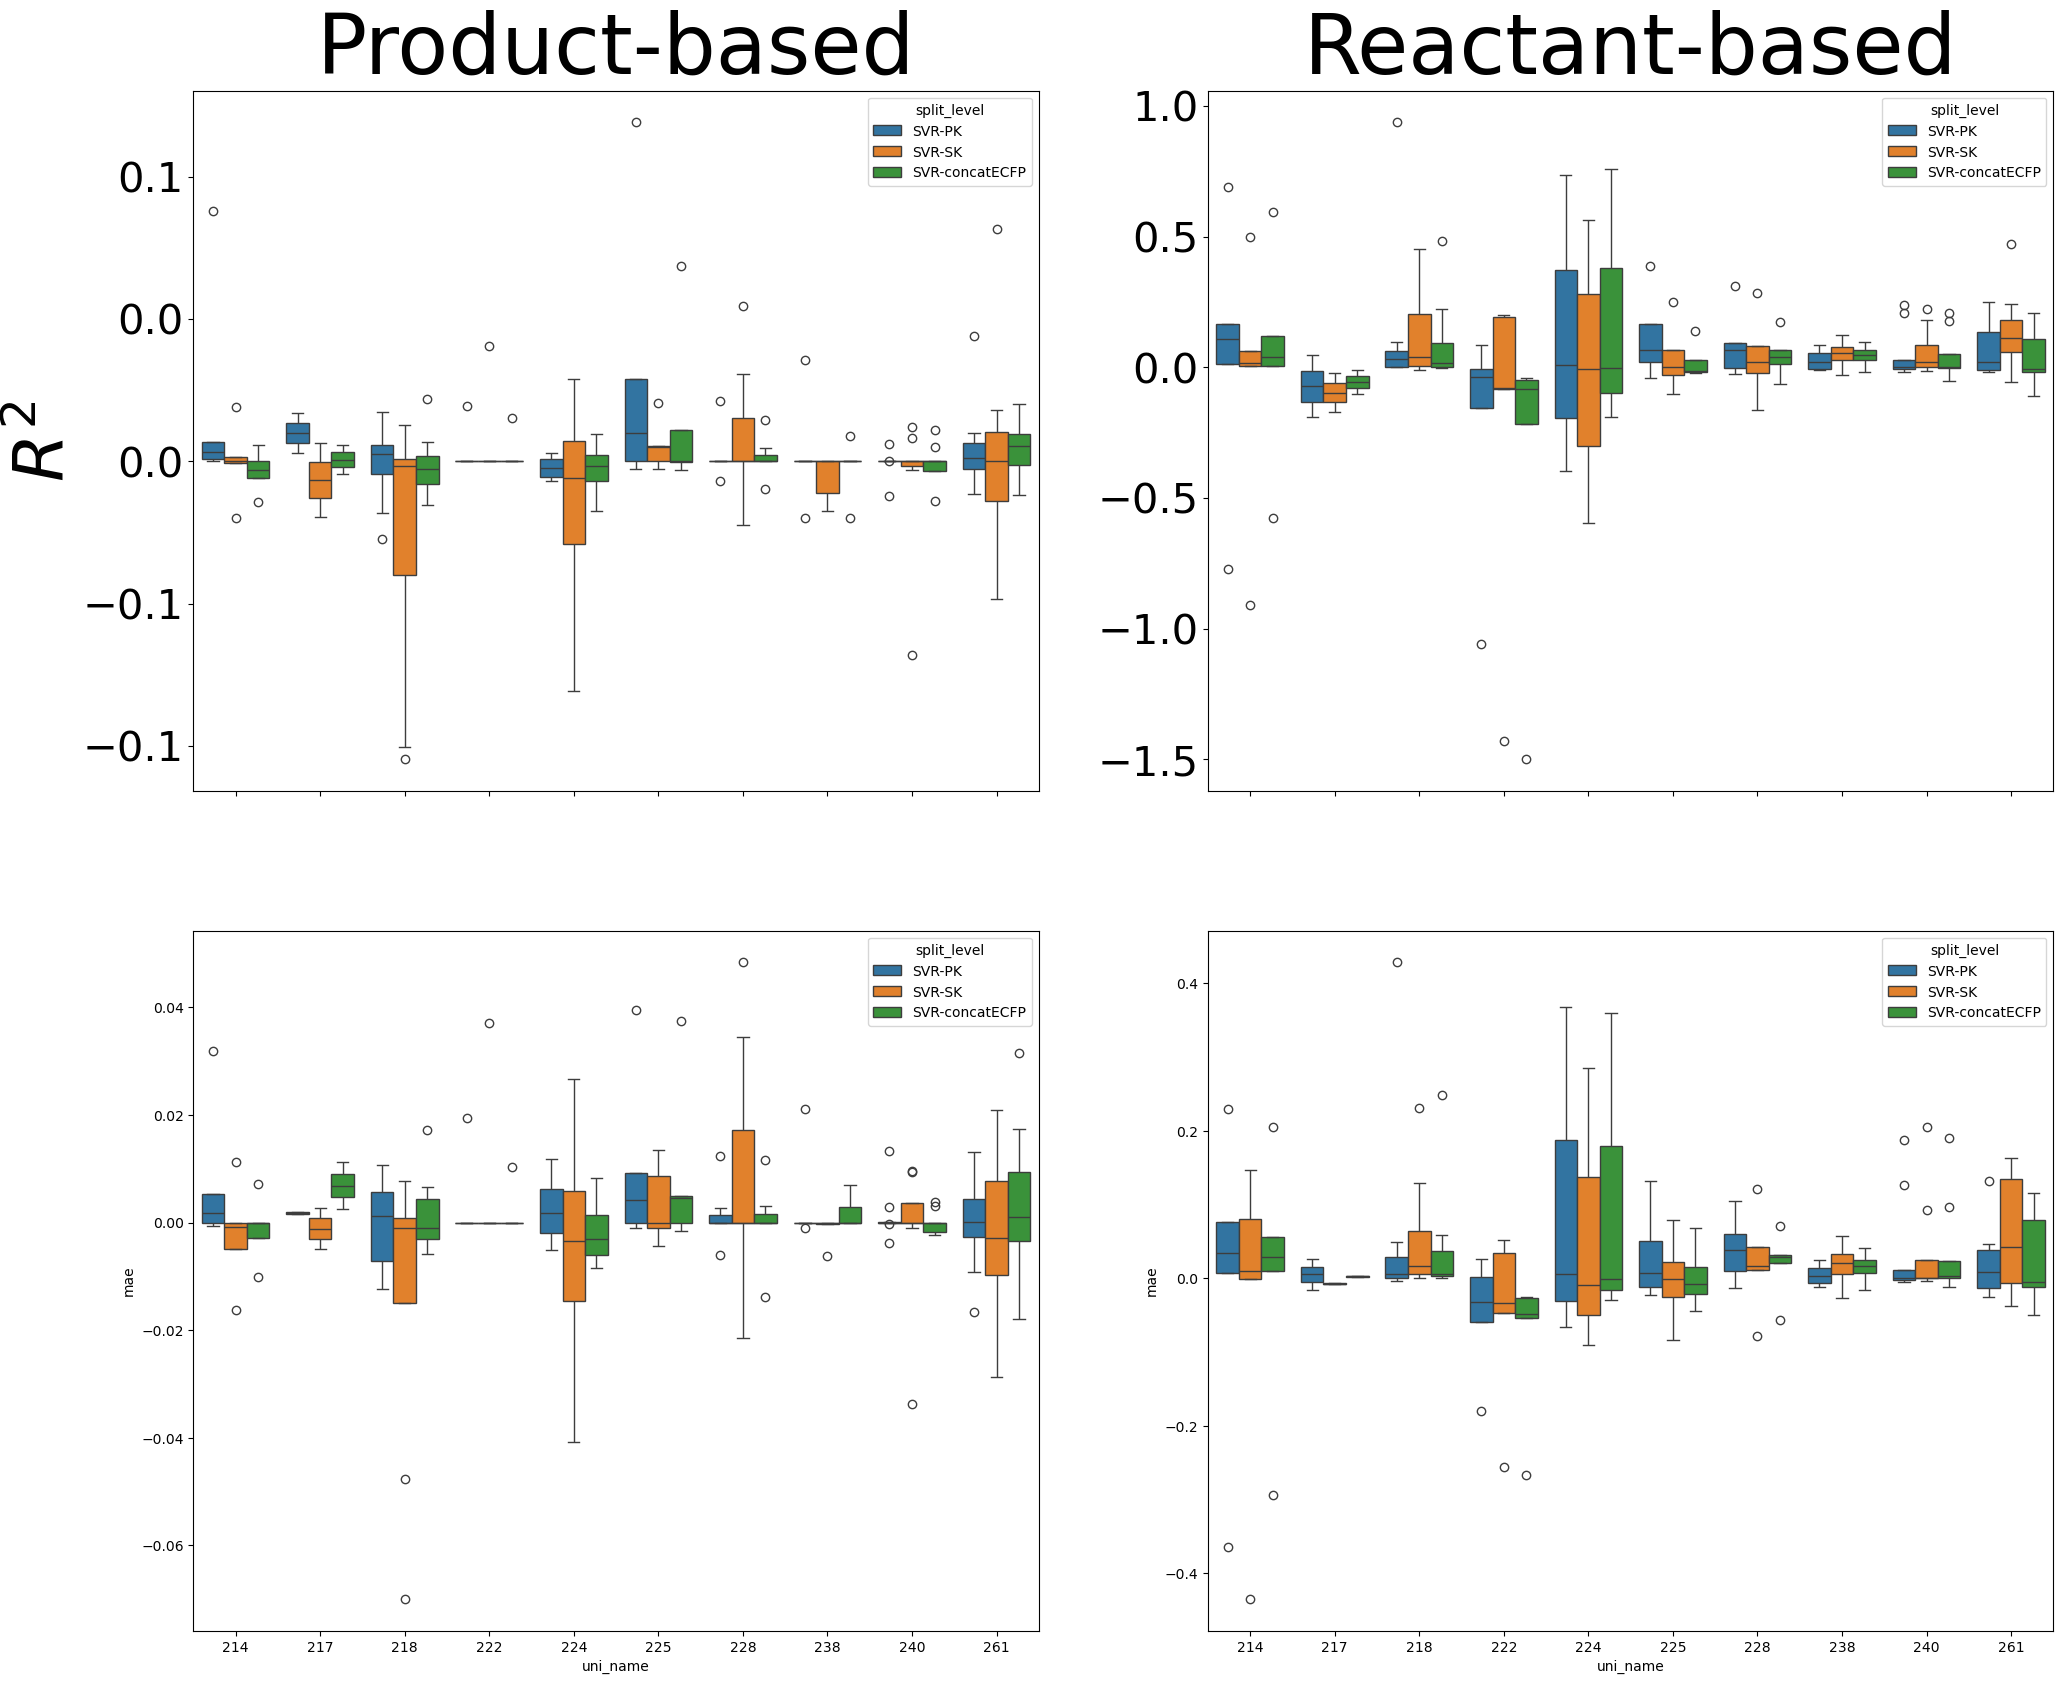

In [3]:
from utils.analysis import load_config, process_augmentation_differences, plot_augmentation_differences
config_file_path = './config/chembl_config_lv1.json'
confs = load_config(config_file_path)
files = confs["files"]
split_levels = [1, 2]
prediction_levels = [f'prediction_level{spl}' for spl in split_levels]

res_dfs = process_augmentation_differences(confs, files, split_levels, prediction_levels)
plot_augmentation_differences(res_dfs, split_levels, 'outputs/statistic_analysis_of_objectives_diff.png')

Wilcoxon signed-rank sum test for the accuracy of reactant and product models

In [4]:
from utils.analysis import load_config, process_statistical_analysis, save_statistical_results
config_file_path = './config/chembl_config_lv1_augment.json'
confs = load_config(config_file_path)
files = confs["files"]
split_levels = [1, 2]
eval_metric = 'r2'

res_dict = process_statistical_analysis(confs, files, split_levels, eval_metric)
save_statistical_results(res_dict, './outputs', eval_metric)

Statistical results saved to ./outputs/wilcoxon_r2_aug.tsv


,SVR-PK vs. SVR-baseline (Product-based),SVR-SK vs. SVR-baseline (Product-based),SVR-concatECFP vs. SVR-baseline (Product-based),SVR-PK vs. SVR-baseline (Reactant-based),SVR-SK vs. SVR-baseline (Reactant-based),SVR-concatECFP vs. SVR-baseline (Reactant-based)
Dataset,,,,,,
214,0.625000,0.625000,0.625000,0.437500,0.312500,0.625000
217,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000
218,0.078125,0.015625,0.312500,0.312500,0.195312,0.195312
222,0.218750,0.109375,0.812500,1.000000,0.625000,0.625000
224,1.000000,0.625000,0.625000,0.500000,0.250000,0.250000
225,0.625000,0.812500,0.625000,0.250000,0.875000,0.375000
228,0.015625,0.687500,0.156250,0.625000,0.625000,0.187500
238,0.312500,0.625000,1.000000,0.875000,0.625000,0.625000
240,0.203125,0.910156,1.000000,0.652344,0.652344,0.910156


Number of models that showed the best accuracy for the reaction data set

In [5]:
from utils.analysis import load_config, analyze_best_model_appearance
config_file_path = './config/chembl_config_lv1_augment.json'
confs = load_config(config_file_path)
files = confs["files"]
split_levels = [1, 2]
com_dict = {
    'svr_tanimoto_split': 'SVR-PK',
    'svr_tanimoto_average': 'SVR-SK',
    'svr_tanimoto': 'SVR-concatECFP'
}
bas_dict = {'svr_tanimoto': 'SVR-baseline'}
output_path = './outputs/appearances_best_aug.tsv'

analyze_best_model_appearance(confs, files, split_levels, com_dict, bas_dict, output_path)


Results saved to ./outputs/appearances_best_aug.tsv


,SVR-concatECFP,SVR-baseline,SVR-SK,SVR-PK
Product-based,2,5,2,1
Reactant-based,1,3,1,5


Number of models accuracy improved with augmentation

In [6]:
from utils.analysis import load_config, analyze_augmentation_effect
config_file_path = './config/chembl_config_lv1_augment.json'
confs = load_config(config_file_path)

files = confs["files"]
split_levels = [1, 2]
prediction_levels = [f'prediction_level{spl}' for spl in split_levels]
com_dict = {
    'svr_tanimoto_split': 'SVR-PK',
    'svr_tanimoto_average': 'SVR-SK',
    'svr_tanimoto': 'SVR-concatECFP'
}

results = analyze_augmentation_effect(confs, files, split_levels, prediction_levels, com_dict)
for level, res in results.items():
    print(f"Results for {level}:")
    print("Model counts:", res['mod'])
    print("Target counts:", res['tar'])

Results for prediction_level1:
Model counts: {'SVR-PK': 28, 'SVR-SK': 19, 'SVR-concatECFP': 18}
Target counts: {'SVR-PK': 8, 'SVR-SK': 3, 'SVR-concatECFP': 3}
Results for prediction_level2:
Model counts: {'SVR-PK': 30, 'SVR-SK': 33, 'SVR-concatECFP': 26}
Target counts: {'SVR-PK': 7, 'SVR-SK': 6, 'SVR-concatECFP': 5}


### plot actual objective and predicted objective by SVR-PK

In [ ]:
from utils.analysis import plot_actual_vs_predicted
config_file_paths = [
    './config/chembl_config_lv1.json',
    './config/chembl_config_lv2.json',
    ]
for config_file_path in config_file_paths:
    plot_actual_vs_predicted(config_file_path)

/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:808: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:809: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:808: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:809: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils

### Applicable domain analysis

Plot the correlation between kernel values and absolute prediction error

In [8]:
from utils.analysis import process_and_plot_correlation

config_file_path = './config/chembl_config_lv2.json'
process_and_plot_correlation(config_file_path)

/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get_yticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get

Correlation plot saved to ./outputs/prediction_level2/214/prediction_error.png


/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get_yticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get

Correlation plot saved to ./outputs/prediction_level2/217/prediction_error.png


/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get_yticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get

Correlation plot saved to ./outputs/prediction_level2/218/prediction_error.png


/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get_yticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get

Correlation plot saved to ./outputs/prediction_level2/222/prediction_error.png


/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get_yticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get

Correlation plot saved to ./outputs/prediction_level2/224/prediction_error.png


/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get_yticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get

Correlation plot saved to ./outputs/prediction_level2/225/prediction_error.png


/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get_yticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get

Correlation plot saved to ./outputs/prediction_level2/228/prediction_error.png


/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get_yticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get

Correlation plot saved to ./outputs/prediction_level2/238/prediction_error.png


/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get_yticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get

Correlation plot saved to ./outputs/prediction_level2/240/prediction_error.png


/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get_yticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:820: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels=axes[i].get_xticklabels(), fontsize=fsize)
/home/yuto_iwasaki/work/SVR-PK/utils/analysis.py:821: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_yticklabels(labels=axes[i].get

Correlation plot saved to ./outputs/prediction_level2/261/prediction_error.png


Extract elements with an error of 0.5 or more between predicted and measured values

In [ ]:
from utils.analysis import extract_large_errors

config_file_path = './config/chembl_config_lv2.json'
extract_large_errors(config_file_path, './outputs/prediction')

# Compare with other methods (Thompson sampling)

### Runtime comparison

/scr/iwasaki/work/SVR-PK/retrosynthesis/retrosyn/generate_retro_templates.py:434: SyntaxWarning: invalid escape sequence '\:'
  label = re.search('\:[0-9]+\]', atom.GetSmarts())
/scr/iwasaki/work/SVR-PK/retrosynthesis/retrosyn/generate_retro_templates.py:470: SyntaxWarning: invalid escape sequence '\:'
  label = re.search('\:[0-9]+\]', atom.GetSmarts())
/scr/iwasaki/work/SVR-PK/retrosynthesis/retrosyn/generate_retro_templates.py:561: SyntaxWarning: invalid escape sequence '\:'
  return set(re.findall('\:([[0-9]+)\]', rxn_smiles))
/scr/iwasaki/work/SVR-PK/retrosynthesis/retrosyn/generate_retro_templates.py:777: SyntaxWarning: invalid escape sequence '\:'
  atom_tags_in_reactant_fragments = re.findall('\:([[0-9]+)\]', reactant_fragments)
/scr/iwasaki/work/SVR-PK/retrosynthesis/retrosyn/generate_retro_templates.py:823: SyntaxWarning: invalid escape sequence '\['
  ((1,2,), '[*]/[CH]=[CH]\[*]'), # cis with two hydrogens
/scr/iwasaki/work/SVR-PK/retrosynthesis/retrosyn/generate_retro_templa

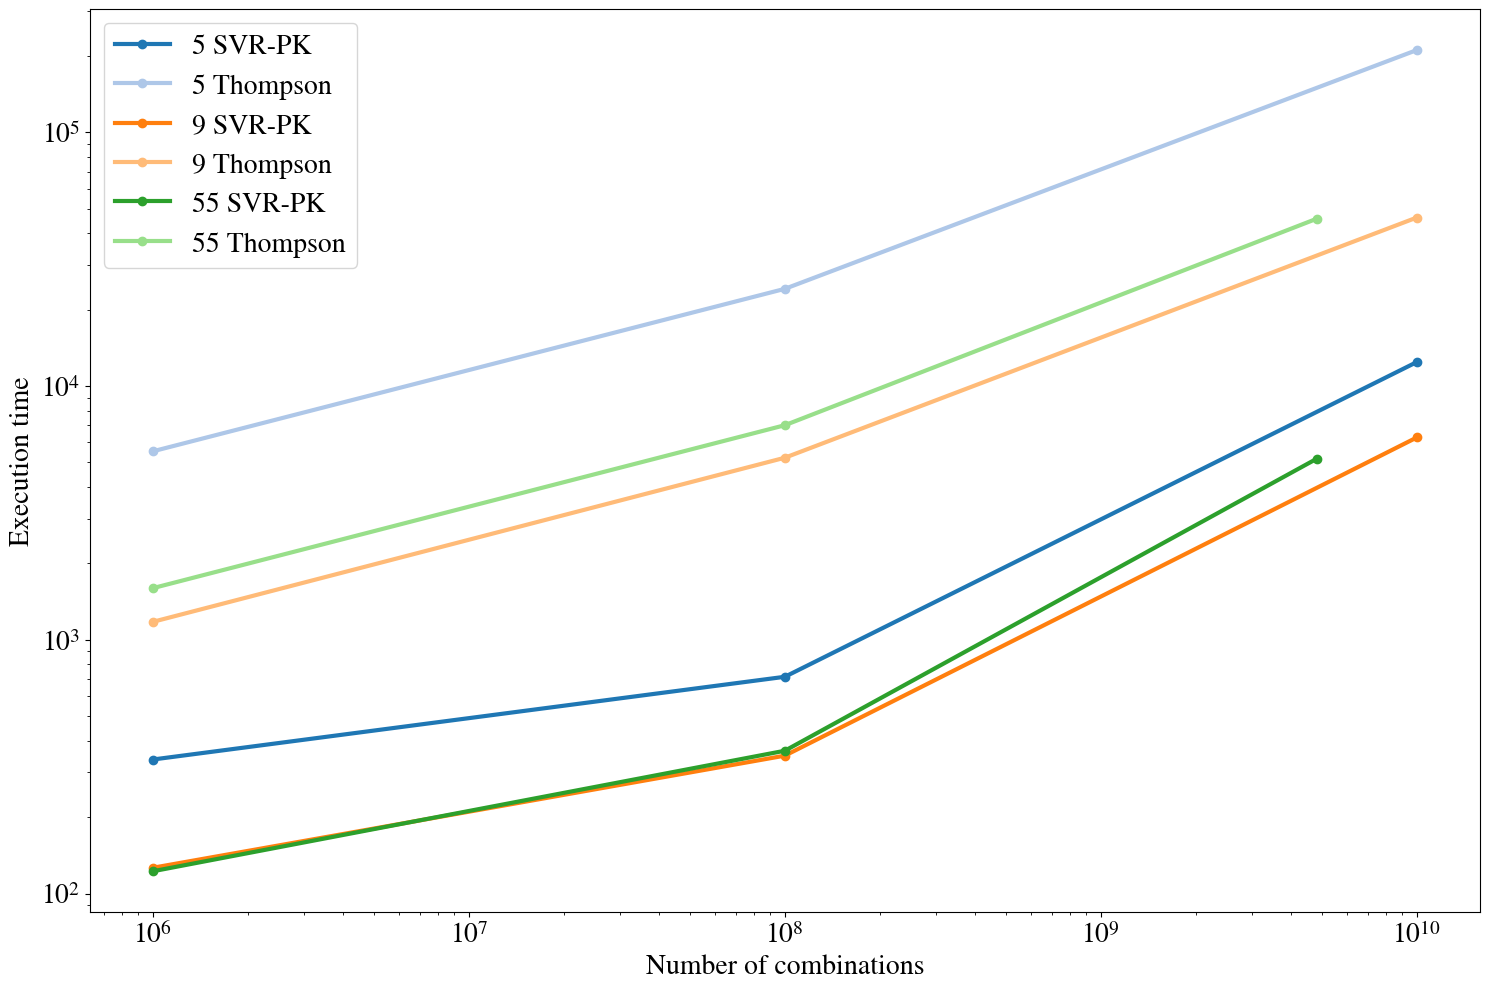

In [1]:
from utils.analysis import plot_runtime_comparison

config_file_path = './config/chembl_config_for_screening_100k.json'
output_dir = './outputs/reactant_combination'

plot_runtime_comparison(
    config_path=config_file_path,
    output_dir=output_dir,
    rct_sizes=[1000, 10000, 100000],
    ids=[5, 9, 55]
)

### Statistical analysis and unique scaffold extraction
Statistical analysis: Number of explored combinations, screened products, eligible products, intersections.

Extract molecular scaffolds using the RDKit.MurckoScaffold module to examine the diversity of extracted compounds.

In [1]:
from utils.analysis import create_analysis_dataframe

config_file_path = './config/chembl_config_for_screening_100k.json'
output_dir = './outputs/reactant_combination'
rxns_path = './chembl31/dataset_explanation.tsv'

create_analysis_dataframe(
    config_path=config_file_path,
    output_dir=output_dir,
    rxns_path=rxns_path,
)

100%|██████████| 35391/35391 [00:07<00:00, 5020.24it/s]


Processing ./chembl31/214.tsv for reaction US20130064770A1
Scaffolds appearance saved to ./outputs/reactant_combination_level1_augmented_10000_rc100000/214/US20130064770A1/sc_appearance.tsv
Thompson sampling scaffolds appearance saved to ./outputs/reactant_combination_level1_augmented_10000_rc100000/214/US20130064770A1/ts_appearance.tsv
Processing ./chembl31/218.tsv for reaction US20080153850A1
Scaffolds appearance saved to ./outputs/reactant_combination_level1_augmented_10000_rc100000/218/US20080153850A1/sc_appearance.tsv
Thompson sampling scaffolds appearance saved to ./outputs/reactant_combination_level1_augmented_10000_rc100000/218/US20080153850A1/ts_appearance.tsv
Processing ./chembl31/261.tsv for reaction US05935990
Scaffolds appearance saved to ./outputs/reactant_combination_level1_augmented_10000_rc100000/261/US05935990/sc_appearance.tsv
Thompson sampling scaffolds appearance saved to ./outputs/reactant_combination_level1_augmented_10000_rc100000/261/US05935990/ts_appearance.ts

### Boxplots of some RDKit descriptors 
for molecules obtained by Thompson sampling and screening (our method)

In [ ]:
from utils.analysis import plot_descriptor_boxplots
plot_descriptor_boxplots(
    config_path='./config/chembl_config_for_screening_100k.json',
    output_path='outputs/statistic_analysis_of_screenedcpds_aug.png'
)

100%|██████████| 35391/35391 [00:12<00:00, 2722.95it/s]
/tmp/ipykernel_151177/2002437040.py:117: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(),fontsize=fsize)
/tmp/ipykernel_151177/2002437040.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=ax.get_yticklabels(),fontsize=fsize)
/tmp/ipykernel_151177/2002437040.py:117: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(),fontsize=fsize)
/tmp/ipykernel_151177/2002437040.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=ax.get_yticklabels(),fontsize=fsize)
/tmp/ipy

### Scaffold network of generated compounds
Omitted since OpenEye is needed for execution 